In [1]:
import sys
sys.path.append('C:\\projects\\UTNCE\\src\\utnce202402')

In [2]:
from simplify import *
from prepare import *
from routing import *
from percolation_plot import *
from generate import *
from transfer import *
from copy import deepcopy
from shapely.geometry import Point,LineString
from pyproj import Proj, Transformer
import pickle
import itertools
from itertools import combinations
import random
from sympy import symbols, Eq, solve
# import datetime
import contextily as ctx

In [3]:
osm_path = "C:\\projects\\UTNCE\\data\\Amsterdam.large.pbf"

# Subway-Amsterdam 

## Generate Baseline network

In [4]:
# Obtain sub-stations in the city
city_sub_stations = sub_stations(osm_path)

In [5]:
# Obtain subway network data
city_sub_network = subway_network(osm_path)

# Prepare the network edges and nodes based on sub-stations and subway network
edges, nodes = prepare_network(city_sub_network, city_sub_stations)

# Expand the edges if required
edges = expand_edges(edges)

# Obtain sub-routes in the city
city_sub_routes = sub_routes(osm_path)

# Sort the sub-routes
city_sub_routes = sorted_routes(city_sub_routes)

# Check the name and assign a column
check_name = check_to_column(city_sub_routes, city_sub_stations)

topology: 100%|████████████████████████████████████████████████████████████████████| 962/962 [00:00<00:00, 4475.21it/s]


In [6]:
# Calculate dataframe length of nodes and edges of metro for adding it to tram dataframes
id_edges_length_sub = len(edges)
id_nodes_length_sub = len(nodes)

In [7]:
# id_nodes_length_sub

In [8]:
# id_edges_length_sub

In [9]:
# create copy dataframe for nodes and edges
city_sub_edges = pd.DataFrame(edges.copy())
city_sub_nodes = pd.DataFrame(nodes.copy())

In [10]:
# delete useless and wrong edges 
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 771) & (city_sub_edges['to_id'] == 761)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 771) & (city_sub_edges['to_id'] == 766)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 762) & (city_sub_edges['to_id'] == 771)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 767) & (city_sub_edges['to_id'] == 771)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 780) & (city_sub_edges['to_id'] == 773)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 780) & (city_sub_edges['to_id'] == 772)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 774) & (city_sub_edges['to_id'] == 780)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 775) & (city_sub_edges['to_id'] == 780)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 180) & (city_sub_edges['to_id'] == 345)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 491) & (city_sub_edges['to_id'] == 492)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 498) & (city_sub_edges['to_id'] == 499)].index, inplace=True)



city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 634) & (city_sub_edges['to_id'] == 635)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 654) & (city_sub_edges['to_id'] == 655)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 584) & (city_sub_edges['to_id'] == 585)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 569) & (city_sub_edges['to_id'] == 570)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 588) & (city_sub_edges['to_id'] == 589)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 577) & (city_sub_edges['to_id'] == 589)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 607) & (city_sub_edges['to_id'] == 577)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 564) & (city_sub_edges['to_id'] == 565)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 586) & (city_sub_edges['to_id'] == 587)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 643) & (city_sub_edges['to_id'] == 644)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 638) & (city_sub_edges['to_id'] == 639)].index, inplace=True)

city_sub_edges = city_sub_edges.reset_index(drop = True)

In [11]:
# revise Zuid metro stations' coordinates, replace 712 with 180 and 345 nodes to avoid wrong shortest-path edges
geometry_value1 = city_sub_nodes.loc[city_sub_nodes['id'] == 180, 'geometry'].values[0]
geometry_value2 = city_sub_nodes.loc[city_sub_nodes['id'] == 345, 'geometry'].values[0]

city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737797', 'geometry'] = geometry_value1
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737797', 'geo_x'] = geometry_value1.x
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737797', 'geo_y'] = geometry_value1.y

city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737796', 'geometry'] = geometry_value2
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737796', 'geo_x'] = geometry_value2.x
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737796', 'geo_y'] = geometry_value2.y

In [12]:
# city_sub_nodes

In [13]:
# city_sub_stations

In [14]:
# city_sub_edges

In [15]:
# city_sub_routes

In [16]:
# Define replacement dictionary of names of destination stations
replacement_dict = {
     'Amsterdam Centraal': 'Centraal Station',
}
# Replace values in the 'to' column of the metro routes using the replacement dictionary
city_sub_routes['to'] = city_sub_routes['to'].replace(replacement_dict, regex=True).str.strip()

# Reset the index of the metro routes
city_sub_routes = city_sub_routes.reset_index(drop=True)

# Check if the values in the 'to' column of the metro routes match the station names
check_name = check_to_column(city_sub_routes, city_sub_stations)

In [17]:
# # restore DataFrames as pickle files
# city_sub_edges.to_pickle('city_sub_edges_0328.pkl')
# city_sub_stations.to_pickle('city_sub_stations_0328.pkl')
# city_sub_nodes.to_pickle('city_sub_nodes_0328.pkl')
# city_sub_routes.to_pickle('city_sub_routes_0328.pkl')

In [18]:
# Create a dictionary mapping start stations to their corresponding routes
city_sub_start_station_name_dict = start_station_dict(city_sub_routes)

# Create a dictionary mapping subway lines to their corresponding routes
city_sub_line_dict = line_dict(city_sub_routes)

# Create a list of all station names in the city's subway network
city_all_sub_stations_name = all_station_list(city_sub_stations)

# Create a dictionary mapping subway lines to the ordered list of stations on each line
city_sub_order_route_dict = order_stations_inline(city_sub_line_dict, city_all_sub_stations_name, city_sub_routes, city_sub_start_station_name_dict)

In [19]:
# city_sub_order_route_dict

In [20]:
# revise station sequence of 51_1 route
df51_1 = pd.read_excel('C:\\projects\\UTNCE\\data\\Metro 51 Centraal Station = Isolatorweg.xlsx',header=None)
df51_1 = df51_1[0::4].reset_index(drop=True)
df51_1.columns = ['name']
df51_1.name[9] = 'Zuid' 
df51_1.name[13] = 'Lelylaan' 
df51_1.name[16] = 'De Vlugtlaan' 

df = city_sub_order_route_dict['Metro 51: Centraal Station => Isolatorweg']
df_reordered = pd.merge(df51_1,df,on='name')

desired_order = ['id', 'name', 'geometry', 'geo_x', 'geo_y']
df_reordered = df_reordered[desired_order]

key_to_replace = 'Metro 51: Centraal Station => Isolatorweg'
city_sub_order_route_dict[key_to_replace] = df_reordered

# city_sub_order_route_dict

In [21]:
# revise station sequence of 52 routes
df52_metro_1 = city_sub_order_route_dict['Metro 52: Noord => Zuid']
df52_metro_2 = city_sub_order_route_dict['Metro 52: Zuid => Noord']

df52_metro_1_dep = df52_metro_1[df52_metro_1.name == 'De Pijp'].copy()
df52_metro_2_dep = df52_metro_2[df52_metro_2.name == 'De Pijp'].copy()


columns_to_swap = ['geometry', 'geo_x', 'geo_y']
for column in columns_to_swap:
    temp = df52_metro_1_dep[column].copy()
    df52_metro_1_dep.loc[df52_metro_1_dep['name'] == 'De Pijp', column] = df52_metro_2_dep.loc[df52_metro_2_dep['name'] == 'De Pijp', column].values
    df52_metro_2_dep.loc[df52_metro_2_dep['name'] == 'De Pijp', column] = temp.values

df52_metro_1.loc[df52_metro_1['name'] == 'De Pijp', columns_to_swap] = df52_metro_1_dep[columns_to_swap].values
df52_metro_2.loc[df52_metro_2['name'] == 'De Pijp', columns_to_swap] = df52_metro_2_dep[columns_to_swap].values

# city_sub_order_route_dict

In [22]:
# city_sub_order_route_dict

In [23]:
# Create a dictionary mapping subway lines to the pairs of station IDs on each line
city_sub_order_id_pairs = id_pairs_inline(city_sub_line_dict, city_sub_order_route_dict, city_sub_nodes)

In [24]:
# Create a graph representing the subway network using the extracted undirected edges and nodes
G = create_ground_graph(city_sub_edges, city_sub_nodes)

# Calculate the shortest path id pairs for each subway line

city_sub_all_shortest_paths_id_dict = city_sub_order_id_pairs.copy()


for line in city_sub_order_id_pairs.keys():
    # Calculate all shortest paths id for the current line using the subway network edges
    city_sub_all_shortest_paths_id_dict[line] = all_shortest_path_id_list(G, city_sub_order_id_pairs[line], city_sub_edges)

In [25]:
# city_sub_all_shortest_paths_id_dict

In [26]:
# city_sub_edges

In [27]:
# Obtain the right ordered edges dataframe of metro
city_sub_ordered_edges = edges_revise_direction(city_sub_all_shortest_paths_id_dict,city_sub_edges)

In [28]:
# city_sub_ordered_edges

In [29]:
# Create a graph representing the subway network using the directed edges and nodes
G = nx.DiGraph()

for _, row in city_sub_nodes.iterrows():
    node = row['id']  # Assuming 'id' is the node identifier
    geometry = row['geometry']
    x, y = geometry.x, geometry.y
    G.add_node(node, pos=(x, y))
    
# Extract the edges from the input DataFrame and create a list of tuples with time
od = city_sub_ordered_edges[['from_id', 'to_id', 'time', 'distance']]
edges_list = []
for i, row in od.iterrows():
    weight_dict = {"weight": row[2]*60}
    tuple_row = (row[0], row[1], weight_dict)
    edges_list.append(tuple_row)
# edges_list
G.add_edges_from(edges_list)

In [30]:
# Calculate the shortest path pairs for each subway line
city_sub_shortest_path_pairs_dict = city_sub_order_id_pairs.copy()
duplicate_row_count = city_sub_order_id_pairs.copy()
city_sub_shortest_path_edges_dict = city_sub_order_id_pairs.copy()
city_sub_edges_dict = city_sub_order_id_pairs.copy()

for line in city_sub_order_id_pairs.keys():
    # Calculate all shortest paths for the current line using the subway network edges
    city_sub_shortest_path_pairs_dict[line] = all_shortest_paths(G, city_sub_order_id_pairs[line], city_sub_ordered_edges)

    # Count the duplicate rows, calculate the weighted edges for shortest paths,
    # and update the subway network edges for the current line
    duplicate_row_count[line], city_sub_shortest_path_edges_dict[line], city_sub_edges_dict[line] = edges_with_count_weight(city_sub_shortest_path_pairs_dict[line], city_sub_ordered_edges)
    
# Plot all subway routes
# plot_routes(city_sub_routes, city_sub_ordered_edges, city_sub_shortest_path_edges_dict)

In [31]:
# city_sub_shortest_path_pairs_dict

## Obtain dataframes of edges,nodes and stations for baseline network of metro

### Add columns to edges--city_sub_extended_edges

In [32]:
city_sub_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(city_sub_shortest_path_edges_dict, city_sub_routes)

In [33]:
city_sub_extended_edges = add_columns_to_edges(city_sub_shortest_path_edges_dict,city_sub_ordered_edges)

In [34]:
# column_to_drop = 'count_weight'
# city_sub_extended_edges = city_sub_extended_edges.drop(columns=column_to_drop)

In [35]:
city_sub_extended_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,to_from,from_to,count_weight,route_name_list,route,ref
0,39271219,"LINESTRING (4.8338612 52.3645995, 4.8338659 52...",subway,None,163,147,25,31.352181,0.001254,"(25, 147)","(147, 25)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51"
1,23207806,"LINESTRING (4.8338659 52.3643177, 4.8338791 52...",subway,None,16,25,23,59.170137,0.002367,"(23, 25)","(25, 23)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51"
2,23207802,"LINESTRING (4.8338791 52.3637859, 4.8339056 52...",subway,None,15,23,24,93.935464,0.003757,"(24, 23)","(23, 24)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51"
3,26983218,"LINESTRING (4.8339056 52.3629417, 4.8339159 52...",subway,None,106,24,109,41.168856,0.001647,"(109, 24)","(24, 109)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51"
4,26983222,"LINESTRING (4.8339159 52.3625717, 4.8339214 52...",subway,None,114,109,588,11.809676,0.000472,"(588, 109)","(109, 588)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,181914333,"LINESTRING (4.9922523 52.2963172, 4.9925652 52...",subway,yard,514,432,437,218.934848,0.008757,"(437, 432)","(432, 437)",NaN,NaN,NaN,NaN
936,181914219,"LINESTRING (4.9922524 52.2963336, 4.9919968 52...",subway,yard,513,171,433,38.240223,0.001530,"(433, 171)","(171, 433)",NaN,NaN,NaN,NaN
937,181913915,"LINESTRING (4.9922524 52.2963762, 4.9920183 52...",subway,yard,510,169,430,38.130870,0.001525,"(430, 169)","(169, 430)",NaN,NaN,NaN,NaN
938,121435131,"LINESTRING (4.9954515 52.2963488, 4.9922524 52...",subway,yard,187,170,171,218.222895,0.008729,"(171, 170)","(170, 171)",NaN,NaN,NaN,NaN


### Organize edges dataframe for baseline network--city_sub_new_edges

In [36]:
city_sub_shortest_path_edges_df = pd.concat(city_sub_shortest_path_edges_dict.values()).reset_index(drop=True)
city_sub_shortest_path_edges_df.drop_duplicates(subset='geometry',inplace=True,ignore_index=True)

In [37]:
# city_sub_shortest_path_edges_df

In [38]:
city_sub_new_edges = pd.merge(city_sub_extended_edges,city_sub_shortest_path_edges_df.geometry,on='geometry',how='inner')

In [39]:
city_sub_new_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,to_from,from_to,count_weight,route_name_list,route,ref
0,39271219,"LINESTRING (4.8338612 52.3645995, 4.8338659 52...",subway,None,163,147,25,31.352181,0.001254,"(25, 147)","(147, 25)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51"
1,23207806,"LINESTRING (4.8338659 52.3643177, 4.8338791 52...",subway,None,16,25,23,59.170137,0.002367,"(23, 25)","(25, 23)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51"
2,23207802,"LINESTRING (4.8338791 52.3637859, 4.8339056 52...",subway,None,15,23,24,93.935464,0.003757,"(24, 23)","(23, 24)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51"
3,26983218,"LINESTRING (4.8339056 52.3629417, 4.8339159 52...",subway,None,106,24,109,41.168856,0.001647,"(109, 24)","(24, 109)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51"
4,26983222,"LINESTRING (4.8339159 52.3625717, 4.8339214 52...",subway,None,114,109,588,11.809676,0.000472,"(588, 109)","(109, 588)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,166187913,"LINESTRING (4.9847396 52.2963405, 4.9850507 52...",subway,None,361,321,318,21.221392,0.000849,"(318, 321)","(321, 318)",1.0,Metro 50: Gein => Isolatorweg,subway,"50, 54"
632,166187917,"LINESTRING (4.9850507 52.2963421, 4.9856334 52...",subway,None,366,654,321,140.268473,0.005611,"(321, 654)","(654, 321)",1.0,Metro 50: Gein => Isolatorweg,subway,"50, 54"
633,166187914,"LINESTRING (4.9850607 52.2963027, 4.9855227 52...",subway,None,362,322,655,57.734405,0.002309,"(655, 322)","(322, 655)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 54"
634,166187914,"LINESTRING (4.985907 52.296299, 4.9861172 52.2...",subway,None,363,655,323,231.454222,0.009258,"(323, 655)","(655, 323)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 54"


### Organize nodes dataframe for baseline network--city_sub_new_nodes

In [40]:
city_sub_shortest_path_nodes_id = pd.DataFrame(list(city_sub_new_edges['from_id'])+list(city_sub_new_edges['to_id'])).drop_duplicates(ignore_index = True)

In [41]:
city_sub_shortest_path_nodes_id = city_sub_shortest_path_nodes_id.rename(columns={0:'id'})

In [42]:
# city_sub_shortest_path_nodes_id

In [43]:
city_sub_new_nodes = pd.merge(city_sub_shortest_path_nodes_id,city_sub_nodes,on='id',how='left').reset_index(drop=True)

In [44]:
city_sub_new_nodes

,id,geometry,degree
0,147,POINT (4.8338612 52.3645995),2
1,25,POINT (4.8338659 52.3643177),2
2,23,POINT (4.8338791 52.3637859),2
3,24,POINT (4.8339056 52.3629417),2
4,109,POINT (4.8339159 52.3625717),2
...,...,...,...
633,180,POINT (4.8772326 52.3393181),3
634,728,POINT (4.9010471 52.3775081),2
635,716,POINT (4.932585 52.4020575),2
636,61,POINT (4.9843391 52.3111615),2


### Add columns to stations--city_sub_new_staions

In [45]:
city_sub_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(city_sub_order_route_dict, city_sub_routes)

In [46]:
city_sub_new_stations = add_columns_to_nodes(city_sub_order_route_dict, city_sub_new_nodes)

In [47]:
city_sub_new_stations

,id,geometry,degree,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
0,328,POINT (4.98916 52.29641),2,Gein,4.989161,52.296407,"(4.9891612, 52.2964067)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
1,855,POINT (4.974 52.29564),2,Reigersbos,4.974000,52.295637,"(4.9740002, 52.2956365)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
2,854,POINT (4.96013 52.29813),2,Holendrecht,4.960126,52.298132,"(4.9601264, 52.2981319)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
3,810,POINT (4.95213 52.30687),2,Bullewijk,4.952129,52.306869,"(4.9521292, 52.306869)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
4,809,POINT (4.94762 52.31181),2,Bijlmer ArenA,4.947618,52.311806,"(4.9476178, 52.311806)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
...,...,...,...,...,...,...,...,...,...,...,...
82,824,POINT (4.96734 52.32837),2,Verrijn Stuartweg,4.967335,52.328367,"(4.9673352, 52.3283668)",Metro 53: Gaasperplas => Centraal Station,subway,53,None
83,823,POINT (4.95669 52.33041),2,Station Diemen Zuid,4.956688,52.330406,"(4.9566878, 52.3304057)",Metro 53: Gaasperplas => Centraal Station,subway,53,None
84,829,POINT (4.94628 52.32683),2,Venserpolder,4.946277,52.326833,"(4.9462773, 52.3268326)",Metro 53: Gaasperplas => Centraal Station,subway,53,None
85,827,POINT (4.93028 52.32974),2,Van der Madeweg,4.930285,52.329735,"(4.9302846, 52.3297352)",Metro 53: Gaasperplas => Centraal Station,subway,"50, 53, 54","50, 53, 54"


# Tram-Amsterdam

## Generate Baseline Networks

In [48]:
city_tram_stations, edges, nodes, city_tram_routes = prepare_tram(osm_path)

topology: 100%|██████████████████████████████████████████████████████████████████| 2204/2204 [00:00<00:00, 4262.21it/s]


Calculate_degree possibly unhappy


In [49]:
# city_tram_stations

In [50]:
id_nodes_length_tram = len(nodes)
id_edges_length_tram = len(edges)

In [51]:
id_nodes_length_tram

1920

In [52]:
id_edges_length_tram 

2204

In [53]:
city_tram_edges = pd.DataFrame(edges.copy())
city_tram_nodes = pd.DataFrame(nodes.copy())

In [54]:
# city_tram_edges

In [55]:
# city_tram_nodes

In [56]:
# Add the number of nodes and edges of metro to tram, which help unify them into one layer netwrok
city_tram_nodes['id'] = city_tram_nodes['id'] + id_nodes_length_sub

id_new_edges_length_sub = city_sub_new_edges['id'].iloc[-1]
city_tram_edges['id'] = city_tram_edges['id'] + id_new_edges_length_sub+1
city_tram_edges['from_id'] = city_tram_edges['from_id'] + id_nodes_length_sub
city_tram_edges['to_id'] = city_tram_edges['to_id'] + id_nodes_length_sub
city_tram_edges['from_to'] = list(zip(city_tram_edges.from_id, city_tram_edges.to_id))
city_tram_edges['to_from'] = list(zip(city_tram_edges.to_id, city_tram_edges.from_id))

In [57]:
# city_tram_edges

In [58]:
# gpd.GeoDataFrame(city_tram_edges[['osm_id', 'id', 'geometry','from_id','to_id','distance','time']]).to_file('city_tram_edges0502.GPKG',driver='GPKG')

In [59]:
# gpd.GeoDataFrame(city_tram_nodes[['geometry','degree','id']]).to_file('city_tram_nodes0505.GPKG',driver='GPKG')

In [60]:
# Delete useless and wrong edges
# tram 12
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2099) & (city_tram_edges['to_id'] == 2100)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1510) & (city_tram_edges['to_id'] == 1369)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2331) & (city_tram_edges['to_id'] == 1369)].index, inplace=True)

# tram 19
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2096) & (city_tram_edges['to_id'] == 1246)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1246) & (city_tram_edges['to_id'] == 2096)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1386) & (city_tram_edges['to_id'] == 1390)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1390) & (city_tram_edges['to_id'] == 1386)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[city_tram_edges['id'] == 1207].index, inplace=True)  

# tram 26-2
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2310) & (city_tram_edges['to_id'] == 1546)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1359) & (city_tram_edges['to_id'] == 2778)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2778) & (city_tram_edges['to_id'] == 1359)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[city_tram_edges['id'] == 1685].index, inplace=True)

# tram 4,14,24
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2150) & (city_tram_edges['to_id'] == 1201)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1806) & (city_tram_edges['to_id'] == 2150)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2777) & (city_tram_edges['to_id'] == 1544)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2776) & (city_tram_edges['to_id'] == 1659)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1641) & (city_tram_edges['to_id'] == 1576)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1640) & (city_tram_edges['to_id'] == 1641)].index, inplace=True)
city_tram_edges = city_tram_edges.reset_index(drop = True)

In [61]:
# city_tram_edges

In [62]:
# city_tram_nodes

In [63]:
# Revise destination name of routes dataframe in 'to' column
city_tram_routes = city_tram_routes.loc[city_tram_routes.ref != 'EMA']

city_tram_routes, check_name = check_tram_routes(city_tram_stations, city_tram_routes)

replacement_dict = {
    ',': '',
    'Diemen': '',
    'Amsterdam': '',
    'Sloterdijk': 'Station Sloterdijk',
    'Osdorp Dijkgraafsplein': 'Dijkgraafplein',
    'Osdorp De Aker': 'Matterhorn'
}

city_tram_stations, city_tram_routes, check_name = recheck_tram_routes(replacement_dict, city_tram_stations, city_tram_routes)


replacement_dict = {
    'Amstelveen Westwijk': 'Westwijk'
}

city_tram_stations, city_tram_routes, check_name = recheck_tram_routes(replacement_dict, city_tram_stations, city_tram_routes)

In [64]:
# city_tram_stations

In [65]:
# city_tram_routes

In [66]:
# Create a dictionary mapping start stations to their corresponding routes
city_tram_start_station_name_dict = start_station_dict(city_tram_routes)

# Create a dictionary mapping tram lines to their corresponding routes
city_tram_line_dict = line_dict(city_tram_routes)

# Create a list of all station names in the city's tram network
city_all_tram_stations_name = all_station_list(city_tram_stations)

# Create a dictionary mapping tram lines to the ordered list of stations on each line
city_tram_order_route_dict = order_stations_inline(city_tram_line_dict, city_all_tram_stations_name, city_tram_routes, city_tram_start_station_name_dict)

# Create a dictionary mapping tram lines to the pairs of station IDs on each line
city_tram_order_id_pairs = id_pairs_inline(city_tram_line_dict, city_tram_order_route_dict, city_tram_nodes)

# Create a graph representing the tram network using the extracted edges and nodes
G = create_ground_graph(city_tram_edges, city_tram_nodes)

# Calculate the shortest path pairs for each tram line
city_tram_all_shortest_paths_id_dict = city_tram_order_id_pairs.copy()


for line in city_tram_order_id_pairs.keys():
    
    city_tram_all_shortest_paths_id_dict[line] = all_shortest_path_id_list(G, city_tram_order_id_pairs[line], city_tram_edges)

In [67]:
# city_tram_order_id_pairs

In [68]:
# city_tram_all_shortest_paths_id_dict

In [69]:
# Obtain the right ordered edges dataframe of tram
city_tram_ordered_edges = edges_revise_direction(city_tram_all_shortest_paths_id_dict,city_tram_edges)

In [70]:
duplicated_rows = city_tram_ordered_edges[city_tram_ordered_edges.index.duplicated(keep=False)]

In [71]:
# duplicated_rows

In [72]:
len(duplicated_rows)

98

In [73]:
# Create a graph representing the tram network using the directed edges and nodes
G = nx.DiGraph()

for _, row in city_tram_nodes.iterrows():
    node = row['id']  # Assuming 'id' is the node identifier
    geometry = row['geometry']
    x, y = geometry.x, geometry.y
    G.add_node(node, pos=(x, y))
    
# Extract the edges from the input DataFrame and create a list of tuples with time
od = city_tram_ordered_edges[['from_id', 'to_id', 'time','distance']]
edges_list = []
for i, row in od.iterrows():
    weight_dict = {"weight": row[2]*60}
    tuple_row = (row[0], row[1], weight_dict)
    edges_list.append(tuple_row)
# edges_list

G.add_edges_from(edges_list)

In [74]:
# Calculate the shortest path pairs for each tram line
city_tram_shortest_path_pairs_dict = city_tram_order_id_pairs.copy()
duplicate_row_count = city_tram_order_id_pairs.copy()
city_tram_shortest_path_edges_dict = city_tram_order_id_pairs.copy()
city_tram_edges_dict = city_tram_order_id_pairs.copy()

for line in city_tram_order_id_pairs.keys():
    # Calculate all shortest paths for the current line using the tram network edges
    city_tram_shortest_path_pairs_dict[line] = all_shortest_paths(G, city_tram_order_id_pairs[line], city_tram_ordered_edges)

    # Count the duplicate rows, calculate the weighted edges for shortest paths,
    # and update the tram network edges for the current line
    duplicate_row_count[line], city_tram_shortest_path_edges_dict[line], city_tram_edges_dict[line] = edges_with_count_weight(city_tram_shortest_path_pairs_dict[line], city_tram_ordered_edges)
    
# # Plot all tram routes
# plot_routes(city_tram_routes, city_tram_ordered_edges, city_tram_shortest_path_edges_dict)

In [75]:
# df1_1 = city_tram_shortest_path_edges_dict['Tram 1: Amsterdam Muiderpoortstation =>Amsterdam Osdorp De Aker']
# df1_2 = city_tram_shortest_path_edges_dict['Tram 1: Amsterdam Osdorp de Aker => Amsterdam Muiderpoortstation']

# df12_1 = city_tram_shortest_path_edges_dict['Tram 12: Amsterdam Centraal Station => Amsterdam Amstelstation']
# df12_2 = city_tram_shortest_path_edges_dict['Tram 12: Amsterdam Amstelstation => Amsterdam Centraal Station']

# df13_1 = city_tram_shortest_path_edges_dict['Tram 13: Amsterdam Centraal Station => Amsterdam Geuzenveld']
# df13_2 = city_tram_shortest_path_edges_dict['Tram 13: Amsterdam Geuzenveld => Amsterdam Centraal Station']

# df14_1 = city_tram_shortest_path_edges_dict['Tram 14: Amsterdam Centraal Station => Amsterdam Flevopark']
# df14_2 = city_tram_shortest_path_edges_dict['Tram 14: Amsterdam Flevopark => Amsterdam Centraal Station']

# df17_1 = city_tram_shortest_path_edges_dict['Tram 17: Amsterdam Centraal Station => Amsterdam Osdorp Dijkgraafsplein']
# df17_2 = city_tram_shortest_path_edges_dict['Tram 17: Amsterdam Osdorp Dijkgraafsplein => Amsterdam Centraal Station']

# df19_1 = city_tram_shortest_path_edges_dict['Tram 19: Amsterdam Sloterdijk => Diemen Sniep']
# df19_2 = city_tram_shortest_path_edges_dict['Tram 19: Diemen Sniep => Amsterdam Sloterdijk']

# df2_1 = city_tram_shortest_path_edges_dict['Tram 2: Amsterdam Centraal Station => Amsterdam Nieuw Sloten']
# df2_2 = city_tram_shortest_path_edges_dict['Tram 2: Amsterdam Nieuw Sloten => Amsterdam Centraal Station']

# df24_1 = city_tram_shortest_path_edges_dict['Tram 24: Amsterdam Centraal Station => Amsterdam VUmc']
# df24_2 = city_tram_shortest_path_edges_dict['Tram 24: Amsterdam VUmc => Amsterdam Centraal Station']

# df25_1 = city_tram_shortest_path_edges_dict['Tram 25: Amstelveen Westwijk => Amsterdam Station Zuid']
# df25_2 = city_tram_shortest_path_edges_dict['Tram 25: Amsterdam Station Zuid => Amstelveen Westwijk']

# df26_1 = city_tram_shortest_path_edges_dict['Tram 26: Amsterdam IJburg => Amsterdam Centraal Station']
# df26_2 = city_tram_shortest_path_edges_dict['Tram 26: Amsterdam Centraal Station => Amsterdam IJburg']

# df3_1 = city_tram_shortest_path_edges_dict['Tram 3: Amsterdam Westergasfabriek => Amsterdam Flevopark']
# df3_2 = city_tram_shortest_path_edges_dict['Tram 3: Amsterdam Flevopark => Amsterdam Westergasfabriek']

# df4_1 = city_tram_shortest_path_edges_dict['Tram 4: Amsterdam Station RAI => Amsterdam Centraal Station']
# df4_2 = city_tram_shortest_path_edges_dict['Tram 4: Amsterdam Centraal Station => Amsterdam Station RAI']

# df5_1 = city_tram_shortest_path_edges_dict['Tram 5: Amstelveen Stadshart => Amsterdam Eerste Marnixdwarsstraat']
# df5_2 = city_tram_shortest_path_edges_dict['Tram 5: Amsterdam Eerste Marnixdwarsstraat => Amstelveen Stadshart']

# df7_1 = city_tram_shortest_path_edges_dict['Tram 7: Amsterdam Azartplein => Amsterdam Slotermeer']
# df7_2 = city_tram_shortest_path_edges_dict['Tram 7: Amsterdam Slotermeer => Amsterdam Azartplein']

In [76]:
# gpd.GeoDataFrame(df1_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df1_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df1_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df1_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df12_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df12_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df12_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df12_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df13_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df13_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df13_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df13_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df14_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df14_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df14_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df14_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df17_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df17_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df17_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df17_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df19_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df19_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df19_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df19_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df2_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df2_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df2_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df2_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df24_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df24_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df24_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df24_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df25_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df25_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df25_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df25_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df26_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df26_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df26_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df26_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df3_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df3_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df3_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df3_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df4_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df4_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df4_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df4_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df5_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df5_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df5_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df5_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df7_1[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df7_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df7_2[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('df7_2_0505.GPKG',driver='GPKG')

## Obtain dataframes of edges,nodes and stations for baseline network of Tram

### Add columns to edges--city_tram_extended_edges

In [77]:
city_tram_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(city_tram_shortest_path_edges_dict, city_tram_routes)

In [78]:
city_tram_extended_edges = add_columns_to_edges(city_tram_shortest_path_edges_dict,city_tram_ordered_edges)

In [79]:
# column_to_drop = 'count_weight'
# city_tram_extended_edges = city_tram_extended_edges.drop(columns=column_to_drop)

In [80]:
# city_tram_extended_edges

### Organize edges dataframe for baseline network--city_tram_new_edges

In [81]:
city_tram_shortest_path_edges_df = pd.concat(city_tram_shortest_path_edges_dict.values()).reset_index(drop=True)
city_tram_shortest_path_edges_df.drop_duplicates(subset='geometry',inplace=True,ignore_index=True)

In [82]:
# city_tram_shortest_path_edges_df

In [83]:
city_tram_new_edges = pd.merge(city_tram_extended_edges,city_tram_shortest_path_edges_df.geometry,on='geometry',how='inner')

In [84]:
# city_tram_new_edges

In [85]:
# gpd.GeoDataFrame(city_tram_new_edges[['osm_id', 'geometry','id','from_id','to_id','distance','time']]).to_file('city_tram_new_edges0506.gpkg',driver = 'GPKG')

### Organize nodes dataframe for baseline network--city_tram_new_nodes

In [86]:
city_tram_shortest_path_nodes_id = pd.DataFrame(list(city_tram_new_edges['from_id'])+list(city_tram_new_edges['to_id'])).drop_duplicates(ignore_index = True)

In [87]:
city_tram_shortest_path_nodes_id = city_tram_shortest_path_nodes_id.rename(columns={0:'id'})

In [88]:
# city_tram_shortest_path_nodes_id

In [89]:
city_tram_new_nodes = pd.merge(city_tram_shortest_path_nodes_id,city_tram_nodes,on='id',how='left').reset_index(drop=True)

In [90]:
# city_tram_new_nodes

### Add columns to stations--city_tram_new_staions

In [91]:
city_tram_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(city_tram_order_route_dict, city_tram_routes)

In [92]:
city_tram_new_stations = add_columns_to_nodes(city_tram_order_route_dict, city_tram_new_nodes)

In [93]:
# city_tram_new_stations

# Build network with straight lines in oneway

In [94]:
def new_half_order_route_dict(city_sub_order_route_dict, city_sub_new_stations):
    city_sub_new_half_order_route_dict = {}
    for i, (key, df) in enumerate(city_sub_order_route_dict.items()):
        if i % 2 == 0:  
            new_df = df[['geometry']]
            new_df = pd.merge(new_df, city_sub_new_stations, on='geometry', how='left')
            city_sub_new_half_order_route_dict[key] = new_df

    return city_sub_new_half_order_route_dict

In [95]:
def new_half_stations_straight_line_df(city_sub_new_half_order_route_dict):
    city_sub_new_half_stations_straight_line_df = pd.DataFrame()
    for key,df in city_sub_new_half_order_route_dict.items():
        city_sub_new_half_stations_straight_line_df = pd.concat([city_sub_new_half_stations_straight_line_df,df])
    city_sub_new_half_stations_straight_line_df.drop_duplicates(subset='geometry',inplace=True,ignore_index=True)
    city_sub_new_half_stations_straight_line_df.reset_index(inplace=True,drop=True)
    return city_sub_new_half_stations_straight_line_df

In [96]:
def new_edges_straight_line_df(city_sub_new_order_route_dict, average_speed):
    city_sub_new_edges_straight_line_df = pd.DataFrame()
    for route_name,stations_df in city_sub_new_order_route_dict.items():
        city_sub_new_edges_dict = {}

        for i in range(len(stations_df) - 1):
            from_station = stations_df.iloc[i]
            to_station = stations_df.iloc[i + 1]
    
            from_id = int(from_station['id'])
            to_id = int(to_station['id'])
            geometry = LineString([from_station['geometry'], to_station['geometry']])
            route_name_list = from_station['route_name_list']

            from_station_df = pd.DataFrame(stations_df.iloc[i]).T
            to_station_df = pd.DataFrame(stations_df.iloc[i + 1]).T
            from_station_gdf = gpd.GeoDataFrame(from_station_df, geometry='geometry', crs='EPSG:4326')
            to_station_gdf = gpd.GeoDataFrame(to_station_df, geometry='geometry', crs='EPSG:4326')
            # Define the coordinate reference systems (CRS)
            crs_deg = 'EPSG:4326'  # WGS 84, the standard coordinate system for GPS
            crs_meter = 'EPSG:3857'  # World Mercator, commonly used for distance calculations
            # Create a transformer to convert from degrees to meters
            transformer = Transformer.from_crs(crs_deg, crs_meter, always_xy=True)
            from_station_gdf['geometry_3857'] = from_station_gdf['geometry'].apply(lambda point: Point(transformer.transform(point.x, point.y)))
            to_station_gdf['geometry_3857'] = to_station_gdf['geometry'].apply(lambda point: Point(transformer.transform(point.x, point.y)))
            # Extracting Point objects
            from_point_3857 = from_station_gdf['geometry_3857'].values[0]
            to_point_3857 = to_station_gdf['geometry_3857'].values[0]
            
            distance = LineString([from_point_3857, to_point_3857]).length
            travel_time = round(distance/average_speed*60)
    
            edge_key = f"{i}"
            city_sub_new_edges_dict[edge_key] = {
                'geometry': geometry,
                'from_id': from_id,
                'to_id': to_id,
                'route_name_list': route_name_list,
                'distance': distance,
                'time': travel_time
                 }
            city_sub_new_edges_each_line_df = pd.DataFrame(city_sub_new_edges_dict).T
            
        city_sub_new_edges_straight_line_df = pd.concat([city_sub_new_edges_straight_line_df,city_sub_new_edges_each_line_df])
        city_sub_new_edges_straight_line_df.drop_duplicates(subset='geometry',inplace=True,ignore_index=True)
        city_sub_new_edges_straight_line_df.reset_index(inplace=True,drop=True)
    return city_sub_new_edges_straight_line_df

## Metro network

In [97]:
city_sub_new_half_order_route_dict = new_half_order_route_dict(city_sub_order_route_dict, city_sub_new_stations)
city_sub_new_half_stations_straight_line_df = new_half_stations_straight_line_df(city_sub_new_half_order_route_dict)
city_sub_new_half_edges_straight_line_df = new_edges_straight_line_df(city_sub_new_half_order_route_dict,25000)

In [98]:
# city_sub_new_half_order_route_dict

In [99]:
# city_sub_new_half_stations_straight_line_df

In [100]:
# city_sub_new_half_edges_straight_line_df

### Plot metro one-way network(without connecting edges)

In [101]:
# import contextily as ctx
# city_sub_new_half_stations_straight_line_gdf = gpd.GeoDataFrame(city_sub_new_half_stations_straight_line_df.copy(), geometry='geometry')
# city_sub_new_half_edges_straight_line_gdf = gpd.GeoDataFrame(city_sub_new_half_edges_straight_line_df.copy(), geometry='geometry')


# fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# city_sub_new_half_stations_straight_line_df.plot(color='red', alpha=0.4, ax=ax, legend=True)
# city_sub_new_half_edges_straight_line_df.plot(color='red', ax=ax, legend=True)
# metro_lines = gpd.read_file("./Metro lines.GPKG")
# ctx.add_basemap(ax=ax, crs=metro_lines.crs.to_string(), source=ctx.providers.Esri.WorldImagery, alpha=0.4)

# ax.set_title('Amsterdam metro straight-line oneway network')
# ax.set_xlabel('Longitude')
# ax.set_ylabel('Latitude')


# plt.show()

## Tram network

In [102]:
city_tram_new_half_order_route_dict = new_half_order_route_dict(city_tram_order_route_dict, city_tram_new_stations)
city_tram_new_half_stations_straight_line_df = new_half_stations_straight_line_df(city_tram_new_half_order_route_dict)
city_tram_new_half_edges_straight_line_df = new_edges_straight_line_df(city_tram_new_half_order_route_dict,14000)

In [103]:
# city_tram_new_half_stations_straight_line_df

In [104]:
# city_tram_new_half_edges_straight_line_df

### Plot tram and metro-tram one-way network(without connecting edges)

In [105]:
city_sub_new_half_stations_straight_line_gdf = gpd.GeoDataFrame(city_sub_new_half_stations_straight_line_df.copy(), geometry='geometry')
city_tram_new_half_stations_straight_line_gdf = gpd.GeoDataFrame(city_tram_new_half_stations_straight_line_df.copy(), geometry='geometry')

In [106]:
# import contextily as ctx
# city_tram_new_half_stations_straight_line_gdf = gpd.GeoDataFrame(city_tram_new_half_stations_straight_line_df.copy(), geometry='geometry')
# city_tram_new_half_edges_straight_line_gdf = gpd.GeoDataFrame(city_tram_new_half_edges_straight_line_df.copy(), geometry='geometry')


# fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# city_tram_new_half_stations_straight_line_gdf.plot(color='blue', alpha=0.4, ax=ax, legend=True)
# city_tram_new_half_edges_straight_line_gdf.plot(color='blue', ax=ax, legend=True)
# metro_lines = gpd.read_file("./Metro lines.GPKG")
# ctx.add_basemap(ax=ax, crs=metro_lines.crs.to_string(), source=ctx.providers.Esri.WorldImagery, alpha=0.4)

# ax.set_title('Amsterdam tram straight-line network')
# ax.set_xlabel('Longitude')
# ax.set_ylabel('Latitude')


# plt.show()

In [107]:
# import contextily as ctx
# city_sub_new_half_stations_straight_line_gdf = gpd.GeoDataFrame(city_sub_new_half_stations_straight_line_df.copy(), geometry='geometry')
# city_sub_new_half_edges_straight_line_gdf = gpd.GeoDataFrame(city_sub_new_half_edges_straight_line_df.copy(), geometry='geometry')
# city_tram_new_half_stations_straight_line_gdf = gpd.GeoDataFrame(city_tram_new_half_stations_straight_line_df.copy(), geometry='geometry')
# city_tram_new_half_edges_straight_line_gdf = gpd.GeoDataFrame(city_tram_new_half_edges_straight_line_df.copy(), geometry='geometry')

# fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# city_sub_new_half_stations_straight_line_gdf.plot(color='red', alpha=0.4, ax=ax, legend=True)
# city_sub_new_half_edges_straight_line_gdf.plot(color='red', ax=ax, legend=True)
# city_tram_new_half_stations_straight_line_gdf.plot(color='blue', alpha=0.4, ax=ax, legend=True)
# city_tram_new_half_edges_straight_line_gdf.plot(color='blue', ax=ax, legend=True)
# metro_lines = gpd.read_file("./Metro lines.GPKG")
# ctx.add_basemap(ax=ax, crs=metro_lines.crs.to_string(), source=ctx.providers.Esri.WorldImagery, alpha=0.4)

# ax.set_title('Amsterdam metro and tram straight-line network')
# ax.set_xlabel('Longitude')
# ax.set_ylabel('Latitude')


# plt.show()

## Create Connecting Edges in one network

In [108]:
def new_half_transfer_stations_name_list(city_sub_new_half_stations_straight_line_df):
    duplicate_names = city_sub_new_half_stations_straight_line_df['name'][city_sub_new_half_stations_straight_line_df['name'].duplicated()].drop_duplicates(ignore_index=True)
    duplicate_names_list = duplicate_names.tolist()
    return duplicate_names_list

In [109]:
def half_create_connect_edges_one_network(connect_stations, id_edges_length_sub, city_sub_new_edges):
    # Extract IDs of connecting stations
    id_list = list(connect_stations['id'])
    # Generate all possible pairs of station IDs
    # id_pairs_list = list(permutations(id_list, 2))
    id_pairs_list = list(combinations(id_list, 2))

    # Extract coordinates of connecting stations
    connect_station_coordinate_list = list(connect_stations['coordinate_value'])
    # Create LineString segments for connecting edges
    # line_segments = [LineString(pair) for pair in permutations(connect_station_coordinate_list, 2)]
    line_segments = [LineString(pair) for pair in combinations(connect_station_coordinate_list, 2)]
    
    connect_stations = gpd.GeoDataFrame(connect_stations, geometry='geometry', crs='EPSG:4326')
    # Define the coordinate reference systems (CRS)
    crs_deg = 'EPSG:4326'  # WGS 84, the standard coordinate system for GPS
    crs_meter = 'EPSG:3857'  # World Mercator, commonly used for distance calculations

    # Create a transformer to convert from degrees to meters
    transformer = Transformer.from_crs(crs_deg, crs_meter, always_xy=True)

    # Apply the transformer to each Point in the 'geometry' column
    connect_stations['geometry_3857'] = connect_stations['geometry'].apply(lambda point: Point(transformer.transform(point.x, point.y)))
    connect_stations_geometry_list = list(connect_stations['geometry_3857'])
    # distance_list = [LineString(pair).length for pair in permutations(connect_stations_geometry_list, 2)]
    distance_list = [LineString(pair).length for pair in combinations(connect_stations_geometry_list, 2)]
    

    # Create a DataFrame to store information about connecting edges
    connect_edges = pd.DataFrame({
        'from_id': [pair[0] for pair in id_pairs_list],
        'to_id': [pair[1] for pair in id_pairs_list],
        'from_to': id_pairs_list,
        'to_from': [(pair[1], pair[0]) for pair in id_pairs_list],
        'geometry': line_segments,
        'distance': distance_list
    })

    # Only keep the links which are less than 500meters
    connect_edges = connect_edges[connect_edges['distance'] <= 500].reset_index(drop=True)
    
    # Assign unique IDs to connecting edges
    connect_edges_id_list = [id_edges_length_sub] + [i for i in range(id_edges_length_sub + 1, id_edges_length_sub + len(connect_edges))]
    connect_edges['id'] = connect_edges_id_list
    
    # Set weights attribute of connecting edges to a value much more higher than the maximum value in city_sub_new_edges to avoid frequently transfer: 15 min/60 min*25000 m/h
    # connect_edges['weights'] = city_sub_new_edges.sort_values(by='weights').weights.iloc[-1] + 1
    # connect_edges['weights'] = city_sub_new_edges.sort_values(by='weights').weights.iloc[-1] + 15/60*25000
    
    # Set time attribute of connecting edges to a value higher than the maximum value in city_sub_new_edges: 15mins for passengers' walking transfer
    # connect_edges['time'] = city_sub_new_edges.sort_values(by='time').time.iloc[-1] +  1
    connect_edges['time'] = 15    
    return connect_edges


def half_connected_all_edges_dataframe(connect_stations_name, city_sub_new_stations, id_edges_length_sub, city_sub_new_edges):
    """
    Creates a DataFrame of connected edges between subway stations.

    Parameters:
        connect_stations_name (list): List of station names that connect different lines.
        city_sub_new_stations (pandas.DataFrame): DataFrame containing subway station data.
        id_edges_length_sub (int): Initial ID for edges in the subway network.
        city_sub_new_edges (pandas.DataFrame): DataFrame containing edges data.

    Returns:
        pandas.DataFrame: DataFrame of connected edges between subway stations.
    """
    connect_edges_dfs = {}
    # Iterate over each connecting station
    for i in range(len(connect_stations_name)):
        # Select DataFrame for the current connecting station
        connect_stations_df = city_sub_new_stations[city_sub_new_stations['name'] == connect_stations_name[i]]

        # Create edges for the current connecting station
        if i == 0:
            connect_edges = half_create_connect_edges_one_network(connect_stations_df, id_edges_length_sub, city_sub_new_edges)
            city_sub_connected_edges = pd.concat([city_sub_new_edges, connect_edges]).reset_index(drop=True)
            id_connected_edges_length_sub = id_edges_length_sub + len(connect_edges)
            # print(connect_edges)
        else:
            connect_edges = half_create_connect_edges_one_network(connect_stations_df, id_connected_edges_length_sub, city_sub_new_edges)
            city_sub_connected_edges = pd.concat([city_sub_connected_edges, connect_edges]).reset_index(drop=True)
            id_connected_edges_length_sub = id_connected_edges_length_sub + len(connect_edges)
            # print(connect_edges)
        connect_edges_dfs[connect_stations_name[i]] = connect_edges
        city_sub_connected_edges = city_sub_connected_edges.dropna(subset=['geometry'])

    return city_sub_connected_edges, connect_edges_dfs

In [110]:
connecting_sub_stations_name_list = new_half_transfer_stations_name_list(city_sub_new_half_stations_straight_line_df)
connecting_sub_stations_name_list

['Overamstel',
 'Centraal Station',
 'Zuid',
 'Spaklerweg',
 'Van der Madeweg',
 'Duivendrecht',
 'Strandvliet',
 'Bijlmer ArenA',
 'Bullewijk',
 'Holendrecht',
 'Reigersbos',
 'Gein']

In [111]:
id_new_edges_length = city_tram_edges['id'].iloc[-1] + 1
id_new_edges_length

np.int64(2572)

In [112]:
city_sub_new_connected_edges_straight_line, city_sub_new_connect_edges_dfs_straight_line = half_connected_all_edges_dataframe(connecting_sub_stations_name_list,city_sub_new_half_stations_straight_line_df,id_new_edges_length,city_sub_new_half_edges_straight_line_df)

In [113]:
# city_sub_new_connected_edges_straight_line

In [114]:
connecting_tram_stations_name_list = new_half_transfer_stations_name_list(city_tram_new_half_stations_straight_line_df)
connecting_tram_stations_name_list

['Centraal Station',
 'Dam',
 'Bilderdijkstraat',
 'Hoekenes',
 'Baden Powellweg',
 'Jan van Galenstraat',
 'Admiraal De Ruijterweg',
 'Willem de Zwijgerlaan',
 'Elandsgracht',
 'Leidseplein',
 'Rijksmuseum',
 'Vijzelgracht',
 'Frederiksplein',
 'Weesperplein',
 "Korte 's-Gravesandestraat",
 'Johan Huizingalaan',
 'De Pijp',
 'Roelof Hartplein',
 'Amstelveenseweg',
 'Beukenweg',
 'Linnaeusstraat',
 'Dapperstraat',
 'Muiderpoortstation',
 'Maasstraat',
 'Waalstraat',
 'Victorieplein',
 'Prinsengracht',
 'Keizersgracht',
 'Rembrandtplein',
 'Rokin',
 'Stadionweg',
 'Gerrit van der Veenstraat',
 'Concertgebouw',
 'Museumplein',
 'Rietlandpark',
 'Alexanderplein',
 'Postjesweg',
 'Mercatorplein']

In [115]:
id_new_edges_length = int(city_sub_new_connected_edges_straight_line['id'].iloc[-1] + 1)
id_new_edges_length

2586

In [116]:
city_tram_new_connected_edges_straight_line, city_tram_new_connect_edges_dfs_straight_line = half_connected_all_edges_dataframe(connecting_tram_stations_name_list,city_tram_new_half_stations_straight_line_df,id_new_edges_length,city_tram_new_half_edges_straight_line_df)

In [117]:
city_tram_new_connected_edges_straight_line

,geometry,from_id,to_id,route_name_list,distance,time,from_to,to_from,id
0,"LINESTRING (4.9326128 52.3607965, 4.9289422 52...",2209,2371,Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,409.348586,2,NaN,NaN,NaN
1,"LINESTRING (4.9289422 52.3609314, 4.9257029 52...",2371,2474,Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,390.015159,2,NaN,NaN,NaN
2,"LINESTRING (4.9257029 52.3601162, 4.9167422 52...",2474,2480,Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,1015.456797,4,NaN,NaN,NaN
3,"LINESTRING (4.9167422 52.3590732, 4.9135923 52...",2480,2466,Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,692.298386,3,NaN,NaN,NaN
4,"LINESTRING (4.9135923 52.3623479, 4.9071213 52...",2466,2448,Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,760.977104,3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
302,"LINESTRING (4.8806042 52.3587143, 4.8812446 52...",2769,2407,NaN,75.700359,15,"(2769, 2407)","(2407, 2769)",2657.0
303,"LINESTRING (4.9334664 52.3732299, 4.9344045 52...",2429,2678,NaN,118.649631,15,"(2429, 2678)","(2678, 2429)",2658.0
304,"LINESTRING (4.9196097 52.3634343, 4.9192366 52...",2597,2465,NaN,90.196585,15,"(2597, 2465)","(2465, 2597)",2659.0
305,"LINESTRING (4.8531487 52.3638557, 4.8531786 52...",2696,2402,NaN,167.238821,15,"(2696, 2402)","(2402, 2696)",2660.0


## Create Connecting Edges in 300m between Metro and Tram

In [118]:
buffer_radius = 300

In [119]:
sub_new_stations_buffer_geometry = new_nodes_buffer(city_sub_new_half_stations_straight_line_df,buffer_radius)
sub_new_stations_buffer_geometry

,geometry,id,degree,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer,buffer_geometry
0,POINT (555390.8842695578 6853898.051924179),328,2,Gein,4.989161,52.296407,"(4.9891612, 52.2964067)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54","POLYGON ((555690.884 6853898.052, 555689.44 68..."
1,POINT (553703.1694696408 6853757.86095247),855,2,Reigersbos,4.974000,52.295637,"(4.9740002, 52.2956365)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54","POLYGON ((554003.169 6853757.861, 554001.725 6..."
2,POINT (552158.7451182732 6854212.079810633),854,2,Holendrecht,4.960126,52.298132,"(4.9601264, 52.2981319)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54","POLYGON ((552458.745 6854212.08, 552457.301 68..."
3,POINT (551268.5008865013 6855802.6299998835),810,2,Bullewijk,4.952129,52.306869,"(4.9521292, 52.306869)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54","POLYGON ((551568.501 6855802.63, 551567.056 68..."
4,POINT (550766.2941357364 6856701.527688845),809,2,Bijlmer ArenA,4.947618,52.311806,"(4.9476178, 52.311806)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54","POLYGON ((551066.294 6856701.528, 551064.85 68..."
5,POINT (550073.8757710531 6857940.867237858),808,2,Strandvliet,4.941398,52.318612,"(4.9413977, 52.3186119)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54","POLYGON ((550373.876 6857940.867, 550372.431 6..."
6,POINT (549535.3566023917 6858849.747531932),852,2,Duivendrecht,4.936560,52.323602,"(4.9365601, 52.3236024)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54","POLYGON ((549835.357 6858849.748, 549833.912 6..."
7,POINT (548855.6731874552 6859975.823104483),828,2,Van der Madeweg,4.930454,52.329785,"(4.9304544, 52.3297847)",Metro 50: Gein => Isolatorweg,subway,"50, 53, 54","50, 53, 54","POLYGON ((549155.673 6859975.823, 549154.229 6..."
8,POINT (547425.4292377941 6860337.250530283),838,2,Overamstel,4.917606,52.331769,"(4.9176063, 52.3317688)",Metro 50: Gein => Isolatorweg,subway,"50, 51","50, 51","POLYGON ((547725.429 6860337.251, 547723.985 6..."
9,POINT (544300.991693852 6861415.781777877),857,2,Station RAI,4.889539,52.337689,"(4.889539, 52.337689)",Metro 50: Gein => Isolatorweg,subway,"50, 51","50, 51","POLYGON ((544600.992 6861415.782, 544599.547 6..."


In [120]:
city_tram_new_stations_ftn = add_footnote_to_new_nodes(city_tram_new_half_stations_straight_line_df)
city_tram_new_stations_ftn

,geometry_tram,id_tram,degree_tram,name_tram,geo_x_tram,geo_y_tram,coordinate_value_tram,route_name_list_tram,route_tram,ref_tram,transfer_tram
0,POINT (549095.9451763834 6865626.846179629),2209,2,Muiderpoortstation,4.932613,52.360796,"(4.9326128, 52.3607965)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
1,POINT (548687.3358534776 6865651.436549241),2371,2,Dapperstraat,4.928942,52.360931,"(4.9289422, 52.3609314)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
2,POINT (548326.7386269509 6865502.838217197),2474,2,Linnaeusstraat,4.925703,52.360116,"(4.9257029, 52.3601162)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
3,POINT (547329.2380657996 6865312.719471466),2480,2,Beukenweg,4.916742,52.359073,"(4.9167422, 52.3590732)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
4,POINT (546978.5928017499 6865909.64907751),2466,2,Korte 's-Gravesandestraat,4.913592,52.362348,"(4.9135923, 52.3623479)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 19, 7","1, 19, 7"
...,...,...,...,...,...,...,...,...,...,...,...
234,POINT (537815.5626880322 6869108.306275565),2526,2,Burgemeester Fockstraat,4.831279,52.379891,"(4.8312794, 52.3798913)",Tram 7: Amsterdam Azartplein => Amsterdam Slot...,tram,7,None
235,POINT (537206.7563928838 6869264.904153384),2533,2,Burgemeester Eliasstraat,4.825810,52.380750,"(4.8258104, 52.38075)",Tram 7: Amsterdam Azartplein => Amsterdam Slot...,tram,7,None
236,POINT (536688.9760453572 6869280.824895416),2528,2,Plein '40-'45,4.821159,52.380837,"(4.8211591, 52.3808373)",Tram 7: Amsterdam Azartplein => Amsterdam Slot...,tram,7,None
237,POINT (536420.8964476287 6868228.609973954),2509,2,Burgemeester Roëllstraat,4.818751,52.375067,"(4.8187509, 52.3750672)",Tram 7: Amsterdam Azartplein => Amsterdam Slot...,tram,7,None


In [121]:
def transfer_A_to_B_oneway(A_new_nodes_buffer_geometry,B_new_nodes_ftn):
    transfer_stations_A_to_B = pd.DataFrame()
    
    for index, row in A_new_nodes_buffer_geometry.iterrows():
        each_transfer_stations_df = B_new_nodes_ftn[row['buffer_geometry'].intersects(B_new_nodes_ftn.iloc[:, 0])]
        
        if not each_transfer_stations_df.empty:
            replicated_row = pd.concat([row] * len(each_transfer_stations_df), axis=1).transpose()
            replicated_row.reset_index(drop=True, inplace=True)  # Reset the index
            each_transfer_stations_df.reset_index(drop=True, inplace=True)  # Reset the index
            co_df = pd.concat([replicated_row,each_transfer_stations_df], axis=1)
            transfer_stations_A_to_B = pd.concat([transfer_stations_A_to_B,co_df])

    transfer_stations_A_to_B = transfer_stations_A_to_B.sort_values(by='name')
    transfer_stations_A_to_B.reset_index(drop=True,inplace=True)
       

    return transfer_stations_A_to_B

In [122]:
transfer_stations_sub_to_tram_oneway = transfer_A_to_B_oneway(sub_new_stations_buffer_geometry,city_tram_new_stations_ftn)
transfer_stations_sub_to_tram_oneway

,geometry,id,degree,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,...,id_tram,degree_tram,name_tram,geo_x_tram,geo_y_tram,coordinate_value_tram,route_name_list_tram,route_tram,ref_tram,transfer_tram
0,POINT (547403.1208118391 6863046.022174509),819,2,Amstelstation,4.917406,52.346636,"(4.9174059, 52.3466361)",Metro 51: Centraal Station => Isolatorweg,subway,"51, 53, 54",...,2101,2,Amstelstation,4.917895,52.347445,"(4.9178945, 52.347445)",Tram 12: Amsterdam Centraal Station => Amsterd...,tram,12,None
1,POINT (540742.3190802236 6861559.002901717),835,2,Amstelveenseweg,4.857571,52.338475,"(4.8575709, 52.3384751)",Metro 50: Gein => Isolatorweg,subway,"50, 51",...,2515,2,Amstelveenseweg,4.857249,52.338422,"(4.8572486, 52.338422)",Tram 24: Amsterdam Centraal Station => Amsterd...,tram,"2, 24","2, 24"
2,POINT (545562.1969967436 6868645.715657004),731,2,Centraal Station,4.900869,52.377355,"(4.9008686, 52.3773546)",Metro 51: Centraal Station => Isolatorweg,subway,"51, 52, 53, 54",...,2178,2,Centraal Station,4.899357,52.378342,"(4.8993575, 52.3783416)",Tram 2: Amsterdam Centraal Station => Amsterda...,tram,"12, 13, 14, 17, 2, 24, 26, 4","12, 13, 14, 17, 2, 24, 26, 4"
3,POINT (545563.2990597024 6868983.734081826),816,2,Centraal Station,4.900879,52.379208,"(4.9008785, 52.3792082)",Metro 52: Noord => Zuid,subway,"51, 52, 53, 54",...,2178,2,Centraal Station,4.899357,52.378342,"(4.8993575, 52.3783416)",Tram 2: Amsterdam Centraal Station => Amsterda...,tram,"12, 13, 14, 17, 2, 24, 26, 4","12, 13, 14, 17, 2, 24, 26, 4"
4,POINT (545563.2990597024 6868983.734081826),816,2,Centraal Station,4.900879,52.379208,"(4.9008785, 52.3792082)",Metro 52: Noord => Zuid,subway,"51, 52, 53, 54",...,2180,2,Centraal Station,4.899155,52.378281,"(4.8991546, 52.3782813)",Tram 17: Amsterdam Centraal Station => Amsterd...,tram,"12, 13, 14, 17, 2, 24, 26, 4","12, 13, 14, 17, 2, 24, 26, 4"
5,POINT (545563.2990597024 6868983.734081826),816,2,Centraal Station,4.900879,52.379208,"(4.9008785, 52.3792082)",Metro 52: Noord => Zuid,subway,"51, 52, 53, 54",...,1544,2,Centraal Station,4.900363,52.377851,"(4.9003629, 52.3778505)",Tram 14: Amsterdam Centraal Station => Amsterd...,tram,"12, 13, 14, 17, 2, 24, 26, 4","12, 13, 14, 17, 2, 24, 26, 4"
6,POINT (545563.2990597024 6868983.734081826),816,2,Centraal Station,4.900879,52.379208,"(4.9008785, 52.3792082)",Metro 52: Noord => Zuid,subway,"51, 52, 53, 54",...,2173,2,Centraal Station,4.899218,52.378303,"(4.8992178, 52.378303)",Tram 13: Amsterdam Centraal Station => Amsterd...,tram,"12, 13, 14, 17, 2, 24, 26, 4","12, 13, 14, 17, 2, 24, 26, 4"
7,POINT (545563.2990597024 6868983.734081826),816,2,Centraal Station,4.900879,52.379208,"(4.9008785, 52.3792082)",Metro 52: Noord => Zuid,subway,"51, 52, 53, 54",...,2177,2,Centraal Station,4.899288,52.378319,"(4.8992878, 52.3783193)",Tram 12: Amsterdam Centraal Station => Amsterd...,tram,"12, 13, 14, 17, 2, 24, 26, 4","12, 13, 14, 17, 2, 24, 26, 4"
8,POINT (545563.2990597024 6868983.734081826),816,2,Centraal Station,4.900879,52.379208,"(4.9008785, 52.3792082)",Metro 52: Noord => Zuid,subway,"51, 52, 53, 54",...,2776,2,Centraal Station,4.900981,52.377700,"(4.9009807, 52.3777002)",Tram 4: Amsterdam Station RAI => Amsterdam Cen...,tram,"12, 13, 14, 17, 2, 24, 26, 4","12, 13, 14, 17, 2, 24, 26, 4"
9,POINT (545562.1969967436 6868645.715657004),731,2,Centraal Station,4.900869,52.377355,"(4.9008686, 52.3773546)",Metro 51: Centraal Station => Isolatorweg,subway,"51, 52, 53, 54",...,2776,2,Centraal Station,4.900981,52.377700,"(4.9009807, 52.3777002)",Tram 4: Amsterdam Station RAI => Amsterdam Cen...,tram,"12, 13, 14, 17, 2, 24, 26, 4","12, 13, 14, 17, 2, 24, 26, 4"


In [123]:
# transfer_stations_sub_to_tram_oneway.loc[:,['name','name_tram']]

In [124]:
def create_connect_edges_oneway(transfer_stations_sub_to_tram):
    
    lines1 = []
    from_id_list1 = []
    to_id_list1 = []


    for index, row in transfer_stations_sub_to_tram.iterrows():
        line = LineString([list(row.iloc[6]), list(row.iloc[18])])
        from_id = row.iloc[1]
        to_id = row.iloc[13]
    
        
        lines1.append(line)
        from_id_list1.append(from_id)
        to_id_list1.append(to_id)

    result_df1 = pd.DataFrame({'geometry': lines1,
                              'from_id':from_id_list1,
                              'to_id':to_id_list1})


    # lines2 = []
    # from_id_list2 = []
    # to_id_list2 = []


    # for index, row in transfer_stations_sub_to_tram.iterrows():
    #     line = LineString([list(row.iloc[18]), list(row.iloc[6])])
    #     from_id = row.iloc[13]
    #     to_id = row.iloc[1]
    
        
    #     lines2.append(line)
    #     from_id_list2.append(from_id)
    #     to_id_list2.append(to_id)

    # result_df2 = pd.DataFrame({'geometry': lines2,
    #                           'from_id':from_id_list2,
    #                           'to_id':to_id_list2}) 

    # result_df = pd.concat([result_df1,result_df2])
    result_df = result_df1
    result_df['from_to'] = list(zip(result_df.from_id,result_df.to_id))
    result_df['to_from'] = list(zip(result_df.to_id,result_df.from_id))
    return result_df

In [125]:
connect_edges_sub_to_tram_oneway = create_connect_edges_oneway(transfer_stations_sub_to_tram_oneway)
connect_edges_sub_to_tram_oneway

,geometry,from_id,to_id,from_to,to_from
0,"LINESTRING (4.9174059 52.3466361, 4.9178945 52...",819,2101,"(819, 2101)","(2101, 819)"
1,"LINESTRING (4.8575709 52.3384751, 4.8572486 52...",835,2515,"(835, 2515)","(2515, 835)"
2,"LINESTRING (4.9008686 52.3773546, 4.8993575 52...",731,2178,"(731, 2178)","(2178, 731)"
3,"LINESTRING (4.9008785 52.3792082, 4.8993575 52...",816,2178,"(816, 2178)","(2178, 816)"
4,"LINESTRING (4.9008785 52.3792082, 4.8991546 52...",816,2180,"(816, 2180)","(2180, 816)"
5,"LINESTRING (4.9008785 52.3792082, 4.9003629 52...",816,1544,"(816, 1544)","(1544, 816)"
6,"LINESTRING (4.9008785 52.3792082, 4.8992178 52...",816,2173,"(816, 2173)","(2173, 816)"
7,"LINESTRING (4.9008785 52.3792082, 4.8992878 52...",816,2177,"(816, 2177)","(2177, 816)"
8,"LINESTRING (4.9008785 52.3792082, 4.9009807 52...",816,2776,"(816, 2776)","(2776, 816)"
9,"LINESTRING (4.9008686 52.3773546, 4.9009807 52...",731,2776,"(731, 2776)","(2776, 731)"


In [126]:
start_id_for_connect_edges_sub_to_tram = int(city_tram_new_connected_edges_straight_line['id'].iloc[-1] + 1)
start_id_for_connect_edges_sub_to_tram

2662

In [127]:
connect_edges_sub_to_tram_id_list = [start_id_for_connect_edges_sub_to_tram] + [i for i in range(start_id_for_connect_edges_sub_to_tram + 1, start_id_for_connect_edges_sub_to_tram + len(connect_edges_sub_to_tram_oneway))]
# connect_edges_sub_to_tram_id_list

In [128]:
connect_edges_sub_to_tram_oneway['id'] = connect_edges_sub_to_tram_id_list

# Set weights attribute of connecting edges to a value higher than the maximum value in city_sub_new_edges
# connect_edges_sub_to_tram_oneway['weights'] = city_sub_new_edges.sort_values(by='weights').weights.iloc[-1] + city_tram_new_edges.sort_values(by='weights').weights.iloc[-1] + 15/60*25000
# Set time attribute of connecting edges to a value higher than the maximum value in city_sub_new_edges
connect_edges_sub_to_tram_oneway['time'] =  15

In [129]:
# import geopandas as gpd
# from shapely.geometry import LineString
# from pyproj import Transformer

def project_geometry(geom):
    transformer = Transformer.from_crs("epsg:4326", "epsg:3857", always_xy=True)
    coords = [transformer.transform(x, y) for x, y in geom.coords]
    return LineString(coords)


connect_edges_sub_to_tram_oneway_gdf = gpd.GeoDataFrame(connect_edges_sub_to_tram_oneway.copy(), geometry='geometry', crs="EPSG:4326")

connect_edges_sub_to_tram_oneway_gdf_3857 = connect_edges_sub_to_tram_oneway_gdf.copy()
connect_edges_sub_to_tram_oneway_gdf_3857['geometry'] = connect_edges_sub_to_tram_oneway_gdf_3857['geometry'].apply(lambda geom: project_geometry(geom))


connect_edges_sub_to_tram_oneway['distance'] = connect_edges_sub_to_tram_oneway_gdf_3857['geometry'].length

In [130]:
connect_edges_sub_to_tram_oneway

,geometry,from_id,to_id,from_to,to_from,id,time,distance
0,"LINESTRING (4.9174059 52.3466361, 4.9178945 52...",819,2101,"(819, 2101)","(2101, 819)",2662,15,157.119611
1,"LINESTRING (4.8575709 52.3384751, 4.8572486 52...",835,2515,"(835, 2515)","(2515, 835)",2663,15,37.159734
2,"LINESTRING (4.9008686 52.3773546, 4.8993575 52...",731,2178,"(731, 2178)","(2178, 731)",2664,15,246.355406
3,"LINESTRING (4.9008785 52.3792082, 4.8993575 52...",816,2178,"(816, 2178)","(2178, 816)",2665,15,231.608872
4,"LINESTRING (4.9008785 52.3792082, 4.8991546 52...",816,2180,"(816, 2180)","(2180, 816)",2666,15,255.730124
5,"LINESTRING (4.9008785 52.3792082, 4.9003629 52...",816,1544,"(816, 1544)","(1544, 816)",2667,15,254.154370
6,"LINESTRING (4.9008785 52.3792082, 4.8992178 52...",816,2173,"(816, 2173)","(2173, 816)",2668,15,247.840804
7,"LINESTRING (4.9008785 52.3792082, 4.8992878 52...",816,2177,"(816, 2177)","(2177, 816)",2669,15,240.067005
8,"LINESTRING (4.9008785 52.3792082, 4.9009807 52...",816,2776,"(816, 2776)","(2776, 816)",2670,15,275.231879
9,"LINESTRING (4.9008686 52.3773546, 4.9009807 52...",731,2776,"(731, 2776)","(2776, 731)",2671,15,64.245375


In [131]:
# connect_edges_sub_to_tram_oneway['id'] = connect_edges_sub_to_tram_id_list

# # Set weights attribute of connecting edges to a value higher than the maximum value in city_sub_new_edges
# connect_edges_sub_to_tram_oneway['distance'] = city_sub_new_edges.sort_values(by='weights').weights.iloc[-1] + city_tram_new_edges.sort_values(by='weights').weights.iloc[-1] + 10000000000
# connect_edges_sub_to_tram_oneway['weights'] = city_sub_new_edges.sort_values(by='weights').weights.iloc[-1] + city_tram_new_edges.sort_values(by='weights').weights.iloc[-1] + 10000000000
# # Set time attribute of connecting edges to a value higher than the maximum value in city_sub_new_edges
# connect_edges_sub_to_tram_oneway['time'] = city_sub_new_edges.sort_values(by='time').time.iloc[-1] + city_tram_new_edges.sort_values(by='time').time.iloc[-1] + 1

In [132]:
# connect_edges_sub_to_tram_oneway

In [133]:
# city_sub_new_half_stations_straight_line_df  ### geometry changes into meters	POINT (555390.884 6853898.052)

In [134]:
# city_tram_new_half_stations_straight_line_df  ### geometry changes into meters	POINT (549095.9451763834 6865626.846179629)

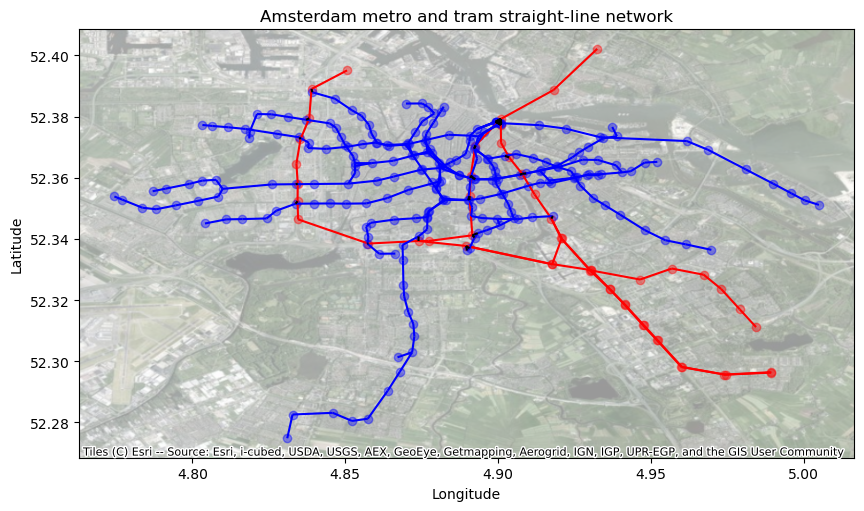

In [135]:
import contextily as ctx
city_sub_new_connected_edges_straight_line_gdf = gpd.GeoDataFrame(city_sub_new_connected_edges_straight_line.copy(), geometry='geometry')
city_tram_new_connected_edges_straight_line_gdf = gpd.GeoDataFrame(city_tram_new_connected_edges_straight_line.copy(), geometry='geometry')
connect_edges_sub_to_tram_oneway_gdf = gpd.GeoDataFrame(connect_edges_sub_to_tram_oneway_gdf.copy(), geometry='geometry')

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

city_sub_new_half_stations_straight_line_gdf.plot(color='red', alpha=0.4, ax=ax, legend=True)
city_sub_new_connected_edges_straight_line_gdf.plot(color='red', ax=ax, legend=True)
city_tram_new_half_stations_straight_line_gdf.plot(color='blue', alpha=0.4, ax=ax, legend=True)
city_tram_new_connected_edges_straight_line_gdf.plot(color='blue', ax=ax, legend=True)
connect_edges_sub_to_tram_oneway_gdf.plot(color='black', ax=ax, legend=True)
metro_lines = gpd.read_file("./Metro lines.GPKG")
ctx.add_basemap(ax=ax, crs=metro_lines.crs.to_string(), source=ctx.providers.Esri.WorldImagery, alpha=0.4)

ax.set_title('Amsterdam metro and tram straight-line network')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')


plt.show()

# Create OD pairs

In [136]:
def get_first_last_points_route_dict(route_dict):
    origin_df = pd.DataFrame()
    for route_name, station_df in route_dict.items():
        first_last_points = station_df.iloc[[0, -1]]
        origin_df = pd.concat([origin_df, first_last_points])
    return origin_df


origin_df = pd.concat([get_first_last_points_route_dict(city_sub_new_half_order_route_dict),
                       get_first_last_points_route_dict(city_tram_new_half_order_route_dict)])


origin_df.drop_duplicates(subset='geometry', inplace=True)


selected_columns = ['geometry', 'name', 'id']
origin_id_df = origin_df[selected_columns].reset_index(drop=True)

In [137]:
# origin_df

In [138]:
origin_id_df

,geometry,name,id
0,POINT (4.9891612 52.2964067),Gein,328
1,POINT (4.8505958 52.3951031),Isolatorweg,805
2,POINT (4.9008686 52.3773546),Centraal Station,731
3,POINT (4.932402 52.4021571),Noord,630
4,POINT (4.8772326 52.3393181),Zuid,180
5,POINT (4.9843391 52.3111615),Gaasperplas,61
6,POINT (4.989299 52.2962711),Gein,323
7,POINT (4.9326128 52.3607965),Muiderpoortstation,2209
8,POINT (4.7745043 52.3538687),Matterhorn,1715
9,POINT (4.8992878 52.3783193),Centraal Station,2177


In [139]:
# destination_id_df = origin_id_df
# destination_id_df

In [140]:
# Repeat the combination
# OD_id_list = []

# for index_origin, row_origin in origin_id_df.iterrows():

       
#     for index_destination, row_destination in destination_id_df.iterrows():


#         if row_origin['name'] != row_destination['name']:
#             # Append a dictionary to the list
#             OD_id_list.append({
#                 's_id': row_origin['id'],
#                 'e_id': row_destination['id']
#              })

# # Create a DataFrame from the list of dictionaries
# OD_id_pairs_df = pd.DataFrame(OD_id_list)  

In [141]:
# OD_id_pairs_df

In [142]:
combinations_list = []
for (i1, row1), (i2, row2) in combinations(origin_id_df.iterrows(), 2):
    if row1['name'] != row2['name']:
        combinations_list.append((row1['id'], row2['id']))

# 转换为 DataFrame
OD_id_pairs_df = pd.DataFrame(combinations_list, columns=['s_id', 'e_id'])

In [143]:
OD_id_pairs_df

,s_id,e_id
0,328,805
1,328,731
2,328,630
3,328,180
4,328,61
...,...,...
519,1059,2036
520,1059,1090
521,2767,2036
522,2767,1090


# Test all OD in normal situation

## Load Graph with city_two_layer_network_nodes and city_two_layer_network_edges

In [144]:
city_two_layer_network_nodes = pd.concat([city_sub_new_nodes,city_tram_new_nodes])
city_two_layer_network_nodes.reset_index(drop=True,inplace=True)

In [145]:
city_two_layer_network_nodes

,id,geometry,degree
0,147,POINT (4.8338612 52.3645995),2
1,25,POINT (4.8338659 52.3643177),2
2,23,POINT (4.8338791 52.3637859),2
3,24,POINT (4.8339056 52.3629417),2
4,109,POINT (4.8339159 52.3625717),2
...,...,...,...
2064,2778,POINT (4.9009723 52.3777976),2
2065,2777,POINT (4.9009806 52.3777485),2
2066,2776,POINT (4.9009807 52.3777002),2
2067,1282,POINT (4.9373469 52.3768181),2


In [146]:
len(city_sub_new_half_stations_straight_line_gdf.copy().drop_duplicates(subset='name'))

39

In [147]:
len(city_tram_new_half_stations_straight_line_gdf.copy().drop_duplicates(subset='name'))

187

In [148]:
city_two_layer_network_stations = pd.concat([city_sub_new_half_stations_straight_line_gdf,city_tram_new_half_stations_straight_line_gdf])
city_two_layer_network_stations.reset_index(drop=True,inplace=True)

In [149]:
city_two_layer_network_stations

,geometry,id,degree,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
0,POINT (4.98916 52.29641),328,2,Gein,4.989161,52.296407,"(4.9891612, 52.2964067)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
1,POINT (4.974 52.29564),855,2,Reigersbos,4.974000,52.295637,"(4.9740002, 52.2956365)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
2,POINT (4.96013 52.29813),854,2,Holendrecht,4.960126,52.298132,"(4.9601264, 52.2981319)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
3,POINT (4.95213 52.30687),810,2,Bullewijk,4.952129,52.306869,"(4.9521292, 52.306869)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
4,POINT (4.94762 52.31181),809,2,Bijlmer ArenA,4.947618,52.311806,"(4.9476178, 52.311806)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
...,...,...,...,...,...,...,...,...,...,...,...
286,POINT (4.83128 52.37989),2526,2,Burgemeester Fockstraat,4.831279,52.379891,"(4.8312794, 52.3798913)",Tram 7: Amsterdam Azartplein => Amsterdam Slot...,tram,7,None
287,POINT (4.82581 52.38075),2533,2,Burgemeester Eliasstraat,4.825810,52.380750,"(4.8258104, 52.38075)",Tram 7: Amsterdam Azartplein => Amsterdam Slot...,tram,7,None
288,POINT (4.82116 52.38084),2528,2,Plein '40-'45,4.821159,52.380837,"(4.8211591, 52.3808373)",Tram 7: Amsterdam Azartplein => Amsterdam Slot...,tram,7,None
289,POINT (4.81875 52.37507),2509,2,Burgemeester Roëllstraat,4.818751,52.375067,"(4.8187509, 52.3750672)",Tram 7: Amsterdam Azartplein => Amsterdam Slot...,tram,7,None


In [150]:
len(city_sub_new_connected_edges_straight_line)

64

In [151]:
len(city_tram_new_connected_edges_straight_line)

307

In [152]:
len(connect_edges_sub_to_tram_oneway)

38

In [153]:
city_two_layer_network_edges = pd.concat([city_sub_new_connected_edges_straight_line,city_tram_new_connected_edges_straight_line,connect_edges_sub_to_tram_oneway])
city_two_layer_network_edges.reset_index(drop=True,inplace=True)

In [154]:
city_two_layer_network_edges

,geometry,from_id,to_id,route_name_list,distance,time,from_to,to_from,id
0,"LINESTRING (4.9891612 52.2964067, 4.9740002 52...",328,855,Metro 50: Gein => Isolatorweg,1693.527311,4,NaN,NaN,NaN
1,"LINESTRING (4.9740002 52.2956365, 4.9601264 52...",855,854,Metro 50: Gein => Isolatorweg,1609.832708,4,NaN,NaN,NaN
2,"LINESTRING (4.9601264 52.2981319, 4.9521292 52...",854,810,Metro 50: Gein => Isolatorweg,1822.740985,4,NaN,NaN,NaN
3,"LINESTRING (4.9521292 52.306869, 4.9476178 52....",810,809,Metro 50: Gein => Isolatorweg,1029.674063,2,NaN,NaN,NaN
4,"LINESTRING (4.9476178 52.311806, 4.9413977 52....",809,808,Metro 50: Gein => Isolatorweg,1419.649855,3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
404,"LINESTRING (4.8910469 52.3606866, 4.8909623 52...",861,2386,NaN,143.12934,15,"(861, 2386)","(2386, 861)",2695.0
405,"LINESTRING (4.9036061 52.3666363, 4.9022284 52...",459,2586,NaN,181.772452,15,"(459, 2586)","(2586, 459)",2696.0
406,"LINESTRING (4.9078472 52.3613094, 4.9091584 52...",460,2449,NaN,146.981525,15,"(460, 2449)","(2449, 460)",2697.0
407,"LINESTRING (4.9078472 52.3613094, 4.9071213 52...",460,2448,NaN,98.324093,15,"(460, 2448)","(2448, 460)",2698.0


In [155]:
city_two_layer_network_edges['from_to'] = city_two_layer_network_edges.apply(lambda row: (row['from_id'], row['to_id']), axis=1)
city_two_layer_network_edges['to_from'] = city_two_layer_network_edges.apply(lambda row: (row['to_id'], row['from_id']), axis=1)

In [156]:
G1 = nx.Graph()
for node_index, row in city_two_layer_network_stations.iterrows():
    geometry = row['geometry']
    node_id = row['id']
    x,y = geometry.x, geometry.y
    G1.add_node(node_id, pos = (x,y))

In [157]:
edges_for_G1 = city_two_layer_network_edges[['from_id', 'to_id', 'time', 'distance']]
for edges, row in edges_for_G1.iterrows():
    from_id = row['from_id']
    to_id = row['to_id']
    weight = row['time']
    G1.add_edge(from_id, to_id, weight = weight)

## Test all OD pairs

In [158]:
OD_shortest_path_nodes_id = {}
OD_shortest_path_edges = {}

for index, row in OD_id_pairs_df.iterrows():
    path_s_e, length_s_e, short_path_edges = shortest_path(G1, row.s_id, row.e_id, city_two_layer_network_edges, weight = "weight")
    OD_shortest_path_nodes_id[index] = path_s_e
    short_path_edges.drop_duplicates(subset='geometry', inplace=True)
    OD_shortest_path_edges[index] = short_path_edges

In [159]:
OD_shortest_path_edges

{0:                                              geometry from_id to_id  \
 0   LINESTRING (4.9891612 52.2964067, 4.9740002 52...     328   855   
 1   LINESTRING (4.9740002 52.2956365, 4.9601264 52...     855   854   
 2   LINESTRING (4.9601264 52.2981319, 4.9521292 52...     854   810   
 3   LINESTRING (4.9521292 52.306869, 4.9476178 52....     810   809   
 4   LINESTRING (4.9476178 52.311806, 4.9413977 52....     809   808   
 5   LINESTRING (4.9413977 52.3186119, 4.9365601 52...     808   852   
 6   LINESTRING (4.9365601 52.3236024, 4.9304544 52...     852   828   
 7   LINESTRING (4.9304544 52.3297847, 4.9176063 52...     828   838   
 8   LINESTRING (4.9176063 52.3317688, 4.889539 52....     838   857   
 9   LINESTRING (4.889539 52.337689, 4.8739633 52.3...     857   840   
 10  LINESTRING (4.8739633 52.3393223, 4.8575709 52...     840   835   
 11  LINESTRING (4.8575709 52.3384751, 4.8345741 52...     835   841   
 12  LINESTRING (4.8345741 52.3463868, 4.834401 52....     84

In [160]:
len(OD_shortest_path_edges)

524

## Mean time and distance

In [161]:
def od_time_distance_df(OD_shortest_path_edges):
    for od,edges_df in OD_shortest_path_edges.items():
        edges_df['total_time'] = edges_df['time'].sum()
        edges_df['total_distance'] = edges_df['distance'].sum()
    
    result_df = pd.DataFrame()
    
    for od,edges_df in OD_shortest_path_edges.items():
    
        first_row = edges_df.iloc[0]
        result_df = pd.concat([result_df,first_row.to_frame().T])
        
    result_df.index = OD_shortest_path_edges.keys()
    result_df = result_df[['total_time','total_distance']]
    result_df['od_num'] = result_df.index
    result_df.reset_index(drop=True,inplace=True)
    
    mean_time = result_df['total_time'].mean()
    mean_distance = result_df['total_distance'].mean()
    mean_result_df = pd.DataFrame({'mean_time': [mean_time],'mean_distance': [mean_distance]})    
         
    return result_df, mean_result_df

In [162]:
od_time_distance_result_df, od_time_distance_mean_result_df = od_time_distance_df(OD_shortest_path_edges)

In [163]:
od_time_distance_result_df

,total_time,total_distance,od_num
0,74,30784.762123,0
1,61,19352.281017,1
2,88,31184.993848,2
3,54,16850.88744,3
4,58,18062.680145,4
...,...,...,...
519,89,20760.708573,519
520,99,22915.498537,520
521,50,11823.351317,521
522,60,13978.14128,522


In [164]:
od_time_distance_mean_result_df

,mean_time,mean_distance
0,70.849237,15949.323103


## Number of times an edge is used

In [165]:
# OD_shortest_path_edges_df = pd.DataFrame()

# for od,edges_df in OD_shortest_path_edges.items():

#     OD_shortest_path_edges_df = pd.concat([OD_shortest_path_edges_df,edges_df])

# OD_shortest_path_edges_value_counts = OD_shortest_path_edges_df['from_to'].value_counts()
# OD_shortest_path_edges_value_counts_df = OD_shortest_path_edges_value_counts.reset_index()
# # OD_shortest_path_edges_value_counts_df.columns = ['geometry', 'count_number']

In [166]:
# OD_shortest_path_edges_value_counts_df

In [167]:
def edges_used_time_count(OD_shortest_path_edges,city_two_layer_network_edges):
    OD_shortest_path_edges_df = pd.DataFrame()

    for od,edges_df in OD_shortest_path_edges.items():
    
        OD_shortest_path_edges_df = pd.concat([OD_shortest_path_edges_df,edges_df])
    
    OD_shortest_path_edges_value_counts = OD_shortest_path_edges_df['geometry'].value_counts()
    OD_shortest_path_edges_value_counts_df = OD_shortest_path_edges_value_counts.reset_index()
    OD_shortest_path_edges_value_counts_all_df = pd.merge(OD_shortest_path_edges_value_counts_df,city_two_layer_network_edges,on='geometry',how='left')
    return OD_shortest_path_edges_value_counts_all_df

In [168]:
OD_shortest_path_edges_value_counts_all_df = edges_used_time_count(OD_shortest_path_edges,city_two_layer_network_edges)

In [169]:
OD_shortest_path_edges_value_counts_all_df

,geometry,count,from_id,to_id,route_name_list,distance,time,from_to,to_from,id
0,"LINESTRING (4.8930014 52.3758615, 4.8908314 52...",100,2550,2481,Tram 12: Amsterdam Centraal Station => Amsterd...,454.369304,2,"(2550, 2481)","(2481, 2550)",NaN
1,"LINESTRING (4.9174059 52.3466361, 4.9206141 52...",78,819,830,Metro 51: Centraal Station => Isolatorweg,1227.507074,3,"(819, 830)","(830, 819)",NaN
2,"LINESTRING (4.8837739 52.3740565, 4.8763385 52...",70,2539,2530,Tram 13: Amsterdam Centraal Station => Amsterd...,885.135006,4,"(2539, 2530)","(2530, 2539)",NaN
3,"LINESTRING (4.8908314 52.373751, 4.8837739 52....",70,2481,2539,Tram 12: Amsterdam Centraal Station => Amsterd...,787.609675,3,"(2481, 2539)","(2539, 2481)",NaN
4,"LINESTRING (4.9078472 52.3613094, 4.9118953 52...",64,460,260,Metro 51: Centraal Station => Isolatorweg,1310.157512,3,"(460, 260)","(260, 460)",NaN
...,...,...,...,...,...,...,...,...,...,...
353,"LINESTRING (4.8906476 52.3539585, 4.8901771 52...",1,863,2722,NaN,239.377914,15,"(863, 2722)","(2722, 863)",2681.0
354,"LINESTRING (4.9326128 52.3607965, 4.9336328 52...",1,2209,1840,NaN,132.855253,15,"(2209, 1840)","(1840, 2209)",2646.0
355,"LINESTRING (4.9071213 52.3610021, 4.9091584 52...",1,2448,2449,NaN,238.320596,15,"(2448, 2449)","(2449, 2448)",2635.0
356,"LINESTRING (4.8993575 52.3783416, 4.9009769 52...",1,2178,1658,NaN,201.273991,15,"(2178, 1658)","(1658, 2178)",2609.0


In [170]:
# OD_shortest_path_edges_df = pd.DataFrame()

# for od,edges_df in OD_shortest_path_edges.items():

#     OD_shortest_path_edges_df = pd.concat([OD_shortest_path_edges_df,edges_df])

# OD_shortest_path_edges_value_counts = OD_shortest_path_edges_df['geometry'].value_counts()
# OD_shortest_path_edges_value_counts_df = OD_shortest_path_edges_value_counts.reset_index()
# # OD_shortest_path_edges_value_counts_df.columns = ['geometry', 'count_number']

In [171]:
# OD_shortest_path_edges_value_counts_df

In [172]:
# OD_shortest_path_edges_value_counts_all_df = pd.merge(OD_shortest_path_edges_value_counts_df,city_two_layer_network_edges,on='geometry',how='left')

In [173]:
# OD_shortest_path_edges_value_counts_all_df

## Output results in QGIS and Excel

In [174]:
od_33 = OD_shortest_path_edges[33]
gpd.GeoDataFrame(od_33[['geometry','from_id','to_id','route_name_list','distance','time']]).to_file('od_33_0702.GPKG',driver='GPKG')

In [175]:
od_107 = OD_shortest_path_edges[107]
gpd.GeoDataFrame(od_107[['geometry','from_id','to_id','route_name_list','distance','time']]).to_file('od_107_0702.GPKG',driver='GPKG')

In [176]:
od_247 = OD_shortest_path_edges[247]
gpd.GeoDataFrame(od_247[['geometry','from_id','to_id','route_name_list','distance','time']]).to_file('od_247_0702.GPKG',driver='GPKG')

In [177]:
od_300 = OD_shortest_path_edges[300]
gpd.GeoDataFrame(od_300[['geometry','from_id','to_id','route_name_list','distance','time']]).to_file('od_300_0702.GPKG',driver='GPKG')

In [178]:
gpd.GeoDataFrame(city_sub_new_half_stations_straight_line_gdf[['id', 'geometry','name','geo_x','geo_y','route_name_list','ref','transfer','route']]).to_file('city_sub_new_half_stations_straight_line_df0702.GPKG',driver='GPKG')
gpd.GeoDataFrame(city_sub_new_connected_edges_straight_line[['geometry', 'from_id', 'to_id', 'route_name_list', 'distance', 'time']]).to_file('city_sub_new_connected_edges_straight_line0702.GPKG',driver='GPKG')

In [179]:
gpd.GeoDataFrame(city_tram_new_half_stations_straight_line_gdf[['id', 'geometry','name','geo_x','geo_y','route_name_list','ref','transfer','route']]).to_file('city_tram_new_half_stations_straight_line_df0702.GPKG',driver='GPKG')
gpd.GeoDataFrame(city_tram_new_connected_edges_straight_line[['geometry', 'from_id', 'to_id', 'route_name_list', 'distance', 'time']]).to_file('city_tram_new_connected_edges_straight_line0702.GPKG',driver='GPKG')

In [180]:
gpd.GeoDataFrame(connect_edges_sub_to_tram_oneway[['geometry', 'from_id', 'to_id', 'distance', 'time']]).to_file('connect_edges_sub_to_tram_oneway0702.GPKG',driver='GPKG')

In [181]:
# city_sub_new_half_stations_straight_line_gdf[['id','geo_x','geo_y','route_name_list','ref']].to_excel('city_sub_new_half_stations_straight_line_df0702.xlsx',header = True,index = False)

In [182]:
# city_tram_new_half_stations_straight_line_gdf[['id','geo_x','geo_y','route_name_list','ref']].to_excel('city_tram_new_half_stations_straight_line_df0702.xlsx',header = True,index = False)

In [183]:
# city_sub_new_connected_edges_straight_line[['from_id', 'to_id', 'route_name_list','distance', 'time']].to_excel('city_sub_new_connected_edges_straight_line0702.xlsx',header = True,index = False)

In [184]:
# city_tram_new_connected_edges_straight_line[['from_id', 'to_id', 'route_name_list','distance', 'time']].to_excel('city_tram_new_connected_edges_straight_line0702.xlsx',header = True,index = False)

In [185]:
# connect_edges_sub_to_tram_oneway[['from_id', 'to_id','distance', 'time']].to_excel('connect_edges_sub_to_tram_oneway0702.xlsx',header = True,index = False)

In [186]:
len(city_sub_new_half_stations_straight_line_df)

52

In [187]:
len(city_tram_new_half_stations_straight_line_df)

239

In [188]:
len(city_sub_new_connected_edges_straight_line)

64

In [189]:
len(city_tram_new_connected_edges_straight_line)

307

In [190]:
len(connect_edges_sub_to_tram_oneway)

38

# Edges Disruption simulation

In [191]:
def one_dep_flood_diff_prob_edges(gpkg_file_route,city_two_layer_network_edges):
    one_dep_flood_prob_category_to_nodes = gpd.read_file(gpkg_file_route)
    one_dep_flood_prob_category_to_nodes = one_dep_flood_prob_category_to_nodes[['from_id', 'to_id', 'flood_probability_category1']]
    one_dep_flood_prob_category_to_nodes = one_dep_flood_prob_category_to_nodes.drop_duplicates(subset=['from_id', 'to_id','flood_probability_category1'])
    one_dep_flood_prob_category_to_nodes = one_dep_flood_prob_category_to_nodes[one_dep_flood_prob_category_to_nodes['flood_probability_category1'] != 0]
    one_dep_flood_prob_category_to_nodes['from_id'] = one_dep_flood_prob_category_to_nodes['from_id'].astype(int)
    one_dep_flood_prob_category_to_nodes['to_id'] = one_dep_flood_prob_category_to_nodes['to_id'].astype(int)
    # Initialize an empty dictionary to store the DataFrames
    df_dict = {}
    
    # Iterate over the unique values in 'flood_probability_category1'
    for category in one_dep_flood_prob_category_to_nodes['flood_probability_category1'].unique():
        # Filter the DataFrame for the current category and store it in the dictionary
        df_dict[category] = one_dep_flood_prob_category_to_nodes[one_dep_flood_prob_category_to_nodes['flood_probability_category1'] == category]
    
    one_depth_diff_prob_disrupted_edges= {}
    one_depth_diff_prob_remained_edges = {}
    
    for key, values in df_dict.items():
        disrupted_edges = pd.merge(city_two_layer_network_edges, values, on=['from_id','to_id'])
        city_two_layer_network_edges_after_disruption = city_two_layer_network_edges[
            ~city_two_layer_network_edges['geometry'].isin(disrupted_edges['geometry'])
        ]
        one_depth_diff_prob_disrupted_edges[key] = disrupted_edges
        one_depth_diff_prob_remained_edges[key] = city_two_layer_network_edges_after_disruption

    return one_depth_diff_prob_disrupted_edges, one_depth_diff_prob_remained_edges

In [192]:
def one_depth_diff_prob_dis_edges_od_test_results(city_two_layer_network_stations, one_depth_diff_prob_remained_edges, OD_id_pairs_df):
    
    one_depth_diff_prob_od_time_distance_dict = {}
    one_depth_diff_prob_od_mean_dict = {}
    one_depth_diff_prob_edges_count_dict = {}
    one_depth_diff_prob_shortest_ids_dict = {}
    one_depth_diff_prob_shortest_paths_dict = {}
    
    for prob_category, remained_edges_df in one_depth_diff_prob_remained_edges.items():
        
        # Create a new graph
        G2 = nx.Graph()
        
        # Add nodes to the graph
        for node_index, row in city_two_layer_network_stations.iterrows():
            geometry = row['geometry']
            node_id = row['id']
            x, y = geometry.x, geometry.y
            G2.add_node(node_id, pos=(x, y))
        
        # Add edges to the graph
        edges_for_G2 = remained_edges_df[['from_id', 'to_id', 'time', 'distance']]
        for edges_index, row in edges_for_G2.iterrows():
            from_id = row['from_id']
            to_id = row['to_id']
            weight = row['time']
            G2.add_edge(from_id, to_id, weight=weight)  
        
        OD_shortest_path_nodes_id = {}
        OD_shortest_path_edges = {}
        
        # Calculate shortest paths for each OD pair
        for index, row in OD_id_pairs_df.iterrows():
            try:
                path_s_e, length_s_e, short_path_edges = shortest_path(G2, row.s_id, row.e_id, remained_edges_df, weight="weight")
                OD_shortest_path_nodes_id[index] = path_s_e
                short_path_edges.drop_duplicates(subset='geometry', inplace=True)
                OD_shortest_path_edges[index] = short_path_edges
            except nx.NodeNotFound:
                continue  # Skip silently if the node is not found
            except nx.NetworkXNoPath:
                continue  # Skip silently if there is no path
        
        od_time_distance_result_df, od_time_distance_mean_result_df = od_time_distance_df(OD_shortest_path_edges)
        one_depth_diff_prob_od_time_distance_dict[prob_category] = od_time_distance_result_df
        one_depth_diff_prob_od_mean_dict[prob_category] = od_time_distance_mean_result_df
        
        OD_shortest_path_edges_value_counts_all_df = edges_used_time_count(OD_shortest_path_edges,city_two_layer_network_edges)
        one_depth_diff_prob_edges_count_dict[prob_category] = OD_shortest_path_edges_value_counts_all_df
        
        # Assign the shortest path edges to the dictionary for the current probability category
        one_depth_diff_prob_shortest_ids_dict[prob_category] = OD_shortest_path_nodes_id
        one_depth_diff_prob_shortest_paths_dict[prob_category] = OD_shortest_path_edges
        
    return one_depth_diff_prob_od_time_distance_dict, one_depth_diff_prob_od_mean_dict, one_depth_diff_prob_edges_count_dict, one_depth_diff_prob_shortest_ids_dict, one_depth_diff_prob_shortest_paths_dict

In [193]:
gpkg_file_route = "C:\\projects\\UTNCE\\data\\0_flood_prob_city_sub_new_connected_edges_to_nodes_50cm.GPKG"
m_0_depth_diff_prob_disrupted_edges, m_0_depth_diff_prob_remained_edges = one_dep_flood_diff_prob_edges(gpkg_file_route,city_two_layer_network_edges)
m_0_depth_diff_prob_od_time_distance_dict, m_0_depth_diff_prob_od_mean_dict, m_0_depth_diff_prob_edges_count_dict, m_0_depth_diff_prob_shortest_ids_dict, m_0_depth_diff_prob_shortest_paths_dict = one_depth_diff_prob_dis_edges_od_test_results(city_two_layer_network_stations, m_0_depth_diff_prob_remained_edges, OD_id_pairs_df)

In [194]:
m_0_depth_diff_prob_od_time_distance_dict

{np.int32(2):     total_time total_distance  od_num
 0           54    9019.171809      65
 1           57   10257.156326      68
 2           84     16566.7855      69
 3           58   10705.556101      70
 4           64   11998.224004      71
 ..         ...            ...     ...
 365         89   20760.708573     519
 366         99   22915.498537     520
 367         50   11823.351317     521
 368         60    13978.14128     522
 369         80   18581.082131     523
 
 [370 rows x 3 columns],
 np.int32(3):     total_time total_distance  od_num
 0           74   13258.390235      32
 1           85   16188.108669      34
 2           82   17227.026832      37
 3           87   18590.623953      38
 4           60   13019.733473      39
 ..         ...            ...     ...
 394         89   20760.708573     519
 395         99   22915.498537     520
 396         50   11823.351317     521
 397         60    13978.14128     522
 398         80   18581.082131     523
 
 [399 row

In [195]:
m_0_depth_diff_prob_od_mean_dict

{np.int32(2):    mean_time  mean_distance
 0  72.632432    14805.43079,
 np.int32(3):    mean_time  mean_distance
 0  71.774436    14552.78154,
 np.int32(1):    mean_time  mean_distance
 0  78.082789   16280.063039}

In [196]:
m_0_depth_diff_prob_edges_count_dict

{np.int32(2):                                               geometry  count from_id to_id  \
 0    LINESTRING (4.8930014 52.3758615, 4.8908314 52...    102    2550  2481   
 1    LINESTRING (4.8739688 52.3408227, 4.8767749 52...     78    2300  2668   
 2    LINESTRING (4.8767749 52.3431074, 4.8768645 52...     78    2668  2666   
 3    LINESTRING (4.8768645 52.346674, 4.8771911 52....     75    2666  2424   
 4    LINESTRING (4.8771911 52.3488198, 4.8820747 52...     73    2424  2765   
 ..                                                 ...    ...     ...   ...   
 293  LINESTRING (4.8993575 52.3783416, 4.9009769 52...      1    2178  1658   
 294  LINESTRING (4.8806042 52.3587143, 4.8812446 52...      1    2769  2407   
 295  LINESTRING (4.8993575 52.3783416, 4.9009807 52...      1    2178  2776   
 296  LINESTRING (4.9003819 52.3778942, 4.9009807 52...      1    1359  2776   
 297  LINESTRING (4.8768971 52.368541, 4.8784804 52....      1    2534  2532   
 
                         

In [197]:
def compare_time_distance_difference(od_time_distance_result_df, dep_diff_prob_shortest_path_dict):
    diff_time_distance_dict = {}
    for prob_category,shortest_path_dict in dep_diff_prob_shortest_path_dict.items():
        result_df, mean_result_df = od_time_distance_df(shortest_path_dict)
        df1 = od_time_distance_result_df
        df2 = result_df
        merged_df = pd.merge(df1, df2, on='od_num', suffixes=('_df1', '_df2'))

        diff_df = merged_df[merged_df['total_time_df1'] != merged_df['total_time_df2']]
        diff_df['diff_total_time'] = diff_df['total_time_df2'] - diff_df['total_time_df1']
        diff_df['diff_total_distance'] = diff_df['total_distance_df2'] - diff_df['total_distance_df1']
        diff_df = diff_df.sort_values(by='diff_total_time')
        diff_time_distance_dict[prob_category] = diff_df
    return diff_time_distance_dict

In [198]:
diff_time_distance_dict = compare_time_distance_difference(od_time_distance_result_df,m_0_depth_diff_prob_shortest_paths_dict)
diff_time_distance_dict

{np.int32(2):     total_time_df1 total_distance_df1  od_num total_time_df2  \
 312             73       11281.458617     466             74   
 305            107       19274.767253     459            108   
 306             40        3464.084664     460             41   
 49              51        6402.685607     203             53   
 133             45        6183.749328     287             47   
 ..             ...                ...     ...            ...   
 255             49        5411.165096     409             75   
 320            101       18112.376875     474            129   
 329             34        2301.694286     483             62   
 3               30        6119.503953      70             58   
 356             67        10119.06824     510             95   
 
     total_distance_df2 diff_total_time diff_total_distance  
 312       13799.408966               1         2517.950348  
 305       21792.717601               1         2517.950348  
 306        5982.03

In [199]:
diff_time_distance_dict[2]

,total_time_df1,total_distance_df1,od_num,total_time_df2,total_distance_df2,diff_total_time,diff_total_distance
312,73,11281.458617,466,74,13799.408966,1,2517.950348
305,107,19274.767253,459,108,21792.717601,1,2517.950348
306,40,3464.084664,460,41,5982.035012,1,2517.950348
49,51,6402.685607,203,53,9134.237375,2,2731.551768
133,45,6183.749328,287,47,7762.236389,2,1578.487061
...,...,...,...,...,...,...,...
255,49,5411.165096,409,75,10926.199563,26,5515.034467
320,101,18112.376875,474,129,23677.916288,28,5565.539413
329,34,2301.694286,483,62,7867.233699,28,5565.539413
3,30,6119.503953,70,58,10705.556101,28,4586.052148


In [211]:
# gpkg_file_route = "C:\\projects\\UTNCE\\data\\0_flood_prob_city_sub_new_connected_edges_to_nodes_50cm.GPKG"

# one_dep_flood_prob_category_to_nodes = gpd.read_file(gpkg_file_route)
# one_dep_flood_prob_category_to_nodes = one_dep_flood_prob_category_to_nodes[['from_id', 'to_id', 'flood_probability_category1']]
# one_dep_flood_prob_category_to_nodes = one_dep_flood_prob_category_to_nodes.drop_duplicates(subset=['from_id', 'to_id','flood_probability_category1'])
# one_dep_flood_prob_category_to_nodes = one_dep_flood_prob_category_to_nodes[one_dep_flood_prob_category_to_nodes['flood_probability_category1'] != 0]
# one_dep_flood_prob_category_to_nodes['from_id'] = one_dep_flood_prob_category_to_nodes['from_id'].astype(int)
# one_dep_flood_prob_category_to_nodes['to_id'] = one_dep_flood_prob_category_to_nodes['to_id'].astype(int)
# # Initialize an empty dictionary to store the DataFrames
# df_dict = {}

# # Iterate over the unique values in 'flood_probability_category1'
# for category in one_dep_flood_prob_category_to_nodes['flood_probability_category1'].unique():
#     # Filter the DataFrame for the current category and store it in the dictionary
#     df_dict[category] = one_dep_flood_prob_category_to_nodes[one_dep_flood_prob_category_to_nodes['flood_probability_category1'] == category]

# one_depth_diff_prob_disrupted_edges= {}
# one_depth_diff_prob_remained_edges = {}

# for key, values in df_dict.items():
#     disrupted_edges = pd.merge(city_two_layer_network_edges, values, on=['from_id','to_id'])
#     city_two_layer_network_edges_after_disruption = city_two_layer_network_edges[
#         ~city_two_layer_network_edges['geometry'].isin(disrupted_edges['geometry'])
#     ]
#     one_depth_diff_prob_disrupted_edges[key] = disrupted_edges
#     one_depth_diff_prob_remained_edges[key] = city_two_layer_network_edges_after_disruption

In [212]:
# one_depth_diff_prob_disrupted_edges

{np.int32(2):                                              geometry from_id to_id  \
 0   LINESTRING (4.9891612 52.2964067, 4.9740002 52...     328   855   
 1   LINESTRING (4.9740002 52.2956365, 4.9601264 52...     855   854   
 2   LINESTRING (4.9601264 52.2981319, 4.9521292 52...     854   810   
 3   LINESTRING (4.9521292 52.306869, 4.9476178 52....     810   809   
 4   LINESTRING (4.9476178 52.311806, 4.9413977 52....     809   808   
 5   LINESTRING (4.9413977 52.3186119, 4.9365601 52...     808   852   
 6   LINESTRING (4.9365601 52.3236024, 4.9304544 52...     852   828   
 7   LINESTRING (4.9176063 52.3317688, 4.889539 52....     838   857   
 8   LINESTRING (4.889539 52.337689, 4.8739633 52.3...     857   840   
 9   LINESTRING (4.8739633 52.3393223, 4.8575709 52...     840   835   
 10  LINESTRING (4.8575709 52.3384751, 4.8345741 52...     835   841   
 11  LINESTRING (4.8345741 52.3463868, 4.834401 52....     841    19   
 12  LINESTRING (4.834401 52.3523291, 4.8344667 52.

In [213]:
# one_depth_diff_prob_remained_edges

{np.int32(2):                                               geometry from_id to_id  \
 7    LINESTRING (4.9304544 52.3297847, 4.9176063 52...     828   838   
 16   LINESTRING (4.8353639 52.3725816, 4.838233 52....     846   844   
 19   LINESTRING (4.9008686 52.3773546, 4.9009379 52...     731   867   
 21   LINESTRING (4.9036061 52.3666363, 4.9078472 52...     459   460   
 22   LINESTRING (4.9078472 52.3613094, 4.9118953 52...     460   260   
 ..                                                 ...     ...   ...   
 404  LINESTRING (4.8910469 52.3606866, 4.8909623 52...     861  2386   
 405  LINESTRING (4.9036061 52.3666363, 4.9022284 52...     459  2586   
 406  LINESTRING (4.9078472 52.3613094, 4.9091584 52...     460  2449   
 407  LINESTRING (4.9078472 52.3613094, 4.9071213 52...     460  2448   
 408  LINESTRING (4.8739633 52.3393223, 4.8739688 52...     840  2300   
 
                                route_name_list     distance time      from_to  \
 7                Metro 50:

In [191]:
def one_dep_flood_diff_prob_disrupted_edges_dict(gpkg_file_route):
    
    m_dep_0_flood_prob_category_to_nodes = gpd.read_file(gpkg_file_route)
    m_dep_0_flood_prob_category_to_nodes = m_dep_0_flood_prob_category_to_nodes[['from_id', 'to_id', 'flood_probability_category1']]
    m_dep_0_flood_prob_category_to_nodes = m_dep_0_flood_prob_category_to_nodes.drop_duplicates(subset=['from_id', 'to_id','flood_probability_category1'])
    m_dep_0_flood_prob_category_to_nodes = m_dep_0_flood_prob_category_to_nodes[m_dep_0_flood_prob_category_to_nodes['flood_probability_category1'] != 0]

    # Initialize an empty dictionary to store the DataFrames
    df_dict = {}
    
    # Iterate over the unique values in 'flood_probability_category1'
    for category in m_dep_0_flood_prob_category_to_nodes['flood_probability_category1'].unique():
        # Filter the DataFrame for the current category and store it in the dictionary
        df_dict[category] = m_dep_0_flood_prob_category_to_nodes[m_dep_0_flood_prob_category_to_nodes['flood_probability_category1'] == category]
    return df_dict

In [192]:
gpkg_file_route = "C:\\projects\\UTNCE\\data\\0_flood_prob_city_sub_new_connected_edges_to_nodes_50cm.GPKG"
m_dep0_flood_diff_prob_disrupted_edges_dict = one_dep_flood_diff_prob_disrupted_edges_dict(gpkg_file_route)

In [193]:
m_dep0_flood_diff_prob_disrupted_edges_dict

{np.int32(2):       from_id to_id  flood_probability_category1
 896       328   855                            2
 2206      855   854                            2
 5897      854   810                            2
 6355      810   809                            2
 7841      809   808                            2
 9275      808   852                            2
 11184     852   828                            2
 14706     838   857                            2
 18807     857   840                            2
 20931     840   835                            2
 23589     835   841                            2
 26236     841    19                            2
 27345      19   843                            2
 28687     843   848                            2
 30077     848   846                            2
 34003     844   121                            2
 36942     121   805                            2
 39079     867   459                            2
 44359     260   819                 

In [194]:
def new_connected_edges_flood_probability(gpkg_file_route, city_two_layer_network_edges):
    
    m_dep_0_flood_prob_category_to_nodes = gpd.read_file(gpkg_file_route)
    m_dep_0_flood_prob_category_to_nodes = m_dep_0_flood_prob_category_to_nodes[['from_id', 'to_id', 'flood_probability_category1']]
    m_dep_0_flood_prob_category_to_nodes = m_dep_0_flood_prob_category_to_nodes.drop_duplicates(subset=['from_id', 'to_id','flood_probability_category1'])
    m_dep_0_flood_prob_category_to_nodes = m_dep_0_flood_prob_category_to_nodes[m_dep_0_flood_prob_category_to_nodes['flood_probability_category1'] != 0]

    one_dep_flood_all_prob_city_sub_new_connected_edges = pd.merge(city_two_layer_network_edges,m_dep_0_flood_prob_category_to_nodes,on=['from_id','to_id'],how='outer')
    

    return one_dep_flood_all_prob_city_sub_new_connected_edges

In [198]:
city_two_layer_network_edges

,geometry,from_id,to_id,route_name_list,distance,time,from_to,to_from,id
0,"LINESTRING (4.9891612 52.2964067, 4.9740002 52...",328,855,Metro 50: Gein => Isolatorweg,1693.527311,4,"(328, 855)","(855, 328)",NaN
1,"LINESTRING (4.9740002 52.2956365, 4.9601264 52...",855,854,Metro 50: Gein => Isolatorweg,1609.832708,4,"(855, 854)","(854, 855)",NaN
2,"LINESTRING (4.9601264 52.2981319, 4.9521292 52...",854,810,Metro 50: Gein => Isolatorweg,1822.740985,4,"(854, 810)","(810, 854)",NaN
3,"LINESTRING (4.9521292 52.306869, 4.9476178 52....",810,809,Metro 50: Gein => Isolatorweg,1029.674063,2,"(810, 809)","(809, 810)",NaN
4,"LINESTRING (4.9476178 52.311806, 4.9413977 52....",809,808,Metro 50: Gein => Isolatorweg,1419.649855,3,"(809, 808)","(808, 809)",NaN
...,...,...,...,...,...,...,...,...,...
404,"LINESTRING (4.8910469 52.3606866, 4.8909623 52...",861,2386,NaN,143.12934,15,"(861, 2386)","(2386, 861)",2695.0
405,"LINESTRING (4.9036061 52.3666363, 4.9022284 52...",459,2586,NaN,181.772452,15,"(459, 2586)","(2586, 459)",2696.0
406,"LINESTRING (4.9078472 52.3613094, 4.9091584 52...",460,2449,NaN,146.981525,15,"(460, 2449)","(2449, 460)",2697.0
407,"LINESTRING (4.9078472 52.3613094, 4.9071213 52...",460,2448,NaN,98.324093,15,"(460, 2448)","(2448, 460)",2698.0


In [195]:
gpkg_file_route = "C:\\projects\\UTNCE\\data\\0_flood_prob_city_sub_new_connected_edges_to_nodes_50cm.GPKG"
m_dep0_flood_all_prob_city_sub_new_connected_edges = new_connected_edges_flood_probability(gpkg_file_route, city_two_layer_network_edges)

In [196]:
m_dep0_flood_all_prob_city_sub_new_connected_edges

,geometry,from_id,to_id,route_name_list,distance,time,from_to,to_from,id,flood_probability_category1
0,"LINESTRING (4.834401 52.3523291, 4.8344667 52....",19,843,Metro 50: Gein => Isolatorweg,1044.827332,3,"(19, 843)","(843, 19)",NaN,NaN
1,"LINESTRING (4.834401 52.3523291, 4.8337504 52....",19,2551,NaN,166.003275,15,"(19, 2551)","(2551, 19)",2685.0,NaN
2,"LINESTRING (4.9672062 52.3282901, 4.9728869 52...",54,56,Metro 53: Centraal Station => Gaasperplas,1051.427884,3,"(54, 56)","(56, 54)",NaN,NaN
3,"LINESTRING (4.9728869 52.3236783, 4.9790073 52...",56,812,Metro 53: Centraal Station => Gaasperplas,1397.429652,3,"(56, 812)","(812, 56)",NaN,NaN
4,"LINESTRING (4.8389786 52.3890375, 4.8505958 52...",121,805,Metro 50: Gein => Isolatorweg,1701.958502,4,"(121, 805)","(805, 121)",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
479,NaN,860,180,NaN,NaN,NaN,NaN,NaN,NaN,1.0
480,NaN,861,863,NaN,NaN,NaN,NaN,NaN,NaN,1.0
481,NaN,863,860,NaN,NaN,NaN,NaN,NaN,NaN,1.0
482,NaN,867,459,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [197]:
m_dep0_flood_all_prob_city_sub_new_connected_edges[(m_dep0_flood_all_prob_city_sub_new_connected_edges.from_id=='121')&(m_dep0_flood_all_prob_city_sub_new_connected_edges.to_id=='805')]

,geometry,from_id,to_id,route_name_list,distance,time,from_to,to_from,id,flood_probability_category1
409,NaN,121,805,NaN,NaN,NaN,NaN,NaN,NaN,1.0
410,NaN,121,805,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [190]:
gpkg_file_route = "C:\\projects\\UTNCE\\data\\0_flood_prob_city_sub_new_connected_edges_to_nodes_50cm.GPKG"
m_dep_0_flood_prob_category_to_nodes = gpd.read_file(gpkg_file_route)
m_dep_0_flood_prob_category_to_nodes = m_dep_0_flood_prob_category_to_nodes[['from_id', 'to_id', 'flood_probability_category1']]
m_dep_0_flood_prob_category_to_nodes

,from_id,to_id,flood_probability_category1
0,328,855,0
1,328,855,0
2,328,855,0
3,328,855,0
4,328,855,0
...,...,...,...
100190,328,323,0
100191,328,323,0
100192,328,323,0
100193,328,323,0


In [192]:
# Dropping duplicates based on 'from_id' and 'to_id' columns
m_dep_0_flood_prob_category_to_nodes = m_dep_0_flood_prob_category_to_nodes.drop_duplicates(subset=['from_id', 'to_id','flood_probability_category1'])
m_dep_0_flood_prob_category_to_nodes = m_dep_0_flood_prob_category_to_nodes[m_dep_0_flood_prob_category_to_nodes['flood_probability_category1'] != 0]
m_dep_0_flood_prob_category_to_nodes

,from_id,to_id,flood_probability_category1
896,328,855,2
2206,855,854,2
4068,854,810,3
5897,854,810,2
6279,810,809,3
...,...,...,...
99278,731,816,2
99611,840,180,2
99800,831,830,2
99965,808,856,2


In [201]:
m_dep_0_flood_prob_category_to_nodes[(m_dep_0_flood_prob_category_to_nodes.from_id=='121')&(m_dep_0_flood_prob_category_to_nodes.to_id=='805')]

,from_id,to_id,flood_probability_category1
35633,121,805,1
36942,121,805,2


In [198]:
# Group by 'from_id' and 'to_id' columns
grouped = m_dep_0_flood_prob_category_to_nodes.groupby(['from_id', 'to_id'])

# Create a new DataFrame to store the result
filtered_df = pd.DataFrame()

# Iterate over each group
for name, group in grouped:
    # If the 'flood_probability_category1' column has more than one unique value, add the group to the new DataFrame
    if len(group['flood_probability_category1'].unique()) >= 1:
        filtered_df = pd.concat([filtered_df, group])

filtered_df

,from_id,to_id,flood_probability_category1
35633,121,805,1
36942,121,805,2
97006,144,323,2
97908,144,323,3
27345,19,843,2
...,...,...,...
68621,860,180,1
63780,861,863,1
65182,863,860,1
39079,867,459,2


In [199]:
filtered_df[(filtered_df.from_id=='328')&(filtered_df.to_id=='855')]

,from_id,to_id,flood_probability_category1
896,328,855,2


In [200]:
# Initialize an empty dictionary to store the DataFrames
df_dict = {}

# Iterate over the unique values in 'flood_probability_category1'
for category in filtered_df['flood_probability_category1'].unique():
    # Filter the DataFrame for the current category and store it in the dictionary
    df_dict[category] = filtered_df[filtered_df['flood_probability_category1'] == category]
df_dict
# # Print the resulting DataFrames stored in the dictionary
# for category, df_subset in df_dict.items():
#     print(f"\nDataFrame for flood_probability_category1 = {category}:")
#     print(df_subset)

{np.int32(1):       from_id to_id  flood_probability_category1
 54        121   805                            1
 9391      459   460                            1
 11996     630   818                            1
 23378     813   861                            1
 28747     816   813                            1
 29085     818   816                            1
 35144     819   831                            1
 49452     835   841                            1
 53229     837   857                            1
 57278     838   857                            1
 84957     860   180                            1
 86459     861   863                            1
 87861     863   860                            1
 91636     867   459                            1,
 np.int32(2):       from_id to_id  flood_probability_category1
 1363      121   805                            2
 2206      144   323                            2
 4122       19   843                            2
 6733      260   819   